In [41]:
import uproot
import numpy as np
import pandas as pd
import uproot
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep as hep

import ultraplot as plot

plot.rc['figure.facecolor'] = 'none'
plot.rc['grid'] = False
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep as hep

import ultraplot as plot

plot.rc['figure.facecolor'] = 'none'
plot.rc['grid'] = False

In [42]:

channel_map = {
    'EE': {
        'Ind. 1': [0, 2239],
        'Ind. 2': [2304, 8063],
        'Coll.': [8064, 13823]
    },
    'EW': {
        'Ind. 1': [13824, 16063],
        'Ind. 2': [16128, 21887],
        'Coll.': [21888, 27647]
    },
    'WE': {
        'Ind. 1': [27648, 29887],
        'Ind. 2': [29952, 35711],
        'Coll.': [35712, 41471]
    },
    'WW': {
        'Ind. 1': [41472, 43711],
        'Ind. 2': [43476, 49535],
        'Coll.': [49536, 55295]
    }
}


In [ ]:
from collections import defaultdict

planeSC_map = defaultdict(list)

data = uproot.open('yzSimulationDebugWriterBeamDataByTPC.root')
for i in range(360):
    planeSC_map[data[f'daq:simpleSC{i}'].keys()[0].split(';')[0]].append(f'daq:simpleSC{i}')

for plane in ['EE', 'EW', 'WE', 'WW']:
    for view in ['I1', 'I2', 'C']:
        fig, axs = plot.subplots(
            [*np.arange(1, 31).reshape(6, 5).T, [*[31]*3, *[32]*3], [*[31]*3, *[32]*3], [*[31]*3, *[32]*3]],
            width=20,
            xlabel='TPC Z / 3 cm', ylabel='TPC Y / 3 cm',
        )

        plane_view = f'{plane}_{view}'
        completeHist = data[planeSC_map[plane_view][0]][plane_view].to_hist()
        superImposedPlane, xedges, yedges = completeHist.to_numpy()
        superImposedPlane = (superImposedPlane > 0).astype(int)
        for i, key in enumerate(planeSC_map[plane_view]):
            hist = data[key][plane_view].to_hist()
            if i > 0: 
                tmp, _, _ = hist.to_numpy()
                tmp = (tmp > 0).astype(int)
                superImposedPlane += tmp
                completeHist += hist
            hep.hist2dplot(hist, cbar=False, ax=axs[i], cmap='cividis', cmin=1e-5)
            axs[i].format(aspect='equal', urtitle=(key if i<15 else None), ultitle=(key if i>=15 else None))
        hep.hist2dplot(completeHist, cbar=False, ax=axs[30], cmap='cividis', cmin=1e-5)
        axs[30].format(aspect='equal', ltitle=f'TPC plane {plane} / view {view}')
        
        Z = superImposedPlane.T
        bounds = np.arange(-0.5, Z.max() + 1.5, 1)
        norm = mpl.colors.BoundaryNorm(bounds, plt.get_cmap('coolwarm').N)
        m = axs[31].pcolormesh(xedges, yedges, Z, cmap='coolwarm', norm=norm)
        axs[31].colorbar(m, ticks=np.arange(Z.max() + 1), loc='ul', frame=False, label='N. of passes')
        axs[31].format(aspect='equal')
        
        fig.savefig(f'TPC_{plane_view}.pdf')
        
    

In [45]:
[*np.arange(1, 31).reshape(6, 5).T, [1, 1, 1, 1, 1, 1]]

[array([ 1,  6, 11, 16, 21, 26]),
 array([ 2,  7, 12, 17, 22, 27]),
 array([ 3,  8, 13, 18, 23, 28]),
 array([ 4,  9, 14, 19, 24, 29]),
 array([ 5, 10, 15, 20, 25, 30]),
 [1, 1, 1, 1, 1, 1]]

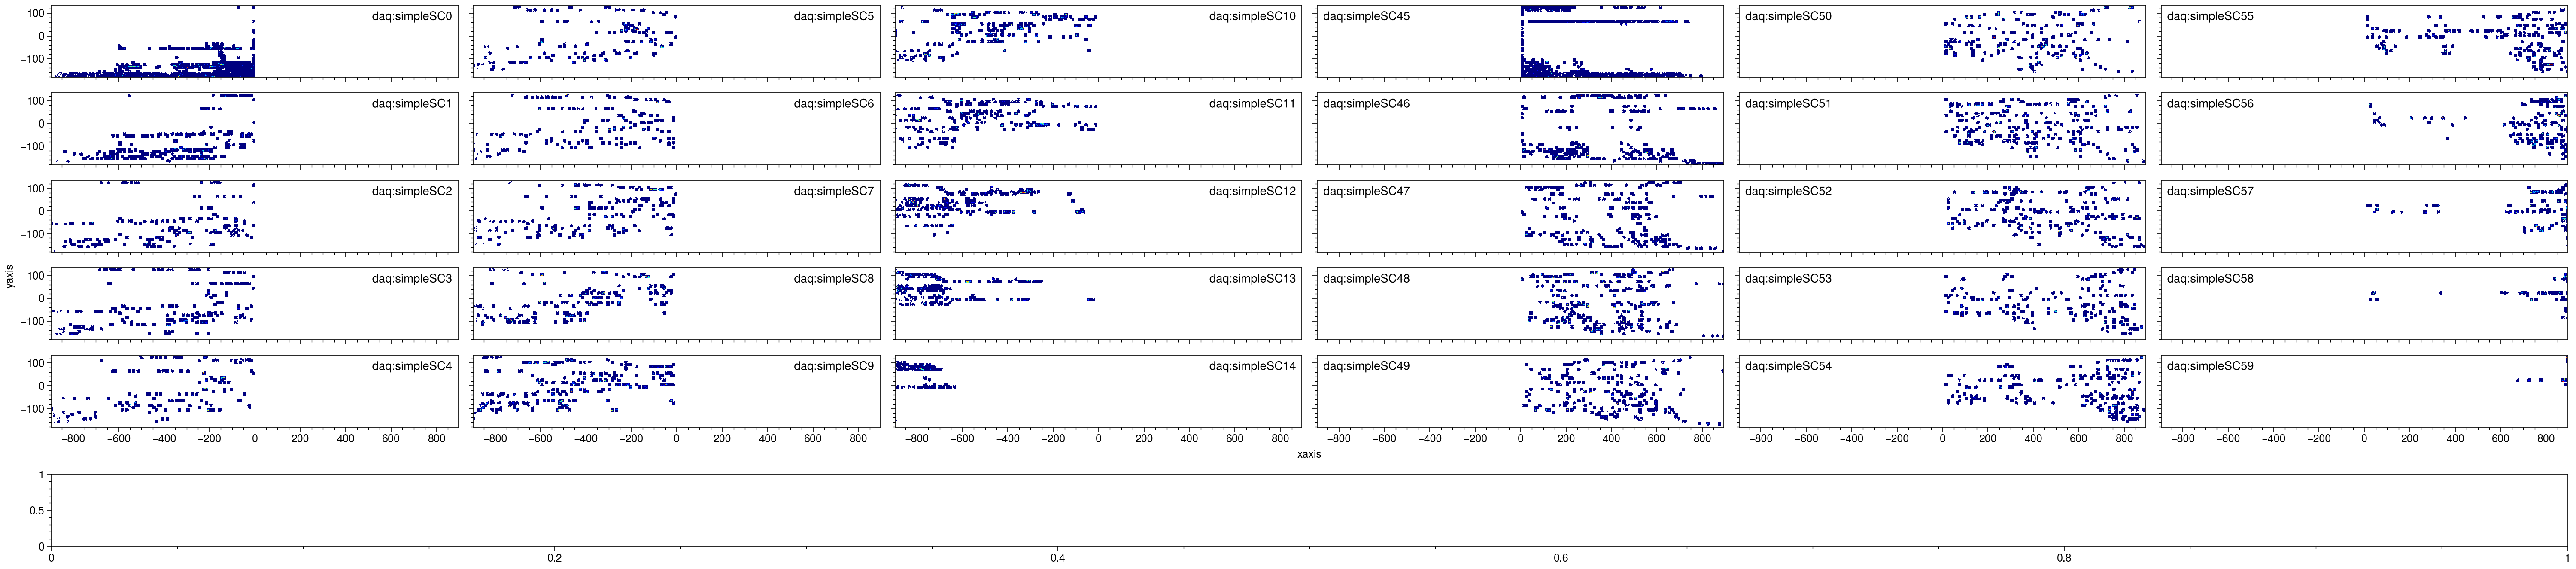

In [22]:
fig, axs = plot.subplots(
    [*np.arange(1, 31).reshape(6, 5).T, [31]*6],
    width=30
)

plane_view = f'EE_I1'
for i, key in enumerate(planeSC_map[plane_view]):
    hist = data[key][plane_view].to_hist()
    hep.hist2dplot(hist, cbar=False, ax=axs[i], cmap='jet', cmin=1e-5)
    axs[i].format(aspect='equal', urtitle=(key if i<15 else None), ultitle=(key if i>=15 else None))
    

In [23]:
[*np.arange(1, 31).reshape(6, 5).T, [*[31]*3, *[32]*3], [*[31]*3, *[32]*3]]

[array([ 1,  6, 11, 16, 21, 26]),
 array([ 2,  7, 12, 17, 22, 27]),
 array([ 3,  8, 13, 18, 23, 28]),
 array([ 4,  9, 14, 19, 24, 29]),
 array([ 5, 10, 15, 20, 25, 30]),
 [31, 31, 31, 32, 32, 32],
 [31, 31, 31, 32, 32, 32]]

/var/folders/rz/xbjc5djs43l2yfd7lq67www80000gn/T/ipykernel_64543/3980933388.py:18: UltraPlotWarning: Ignoring unused keyword arg(s): {'vmin': -0.5, 'vmax': 26.5}
  m = ax.pcolormesh(xedges, yedges, Z, cmap='coolwarm', norm=norm)


0
2239
2304
8063
8064
13823
13824
16063
16128
21887
21888
27647
27648
29887
29952
35711
35712
41471
41472
43711
43476
49535
49536
55295


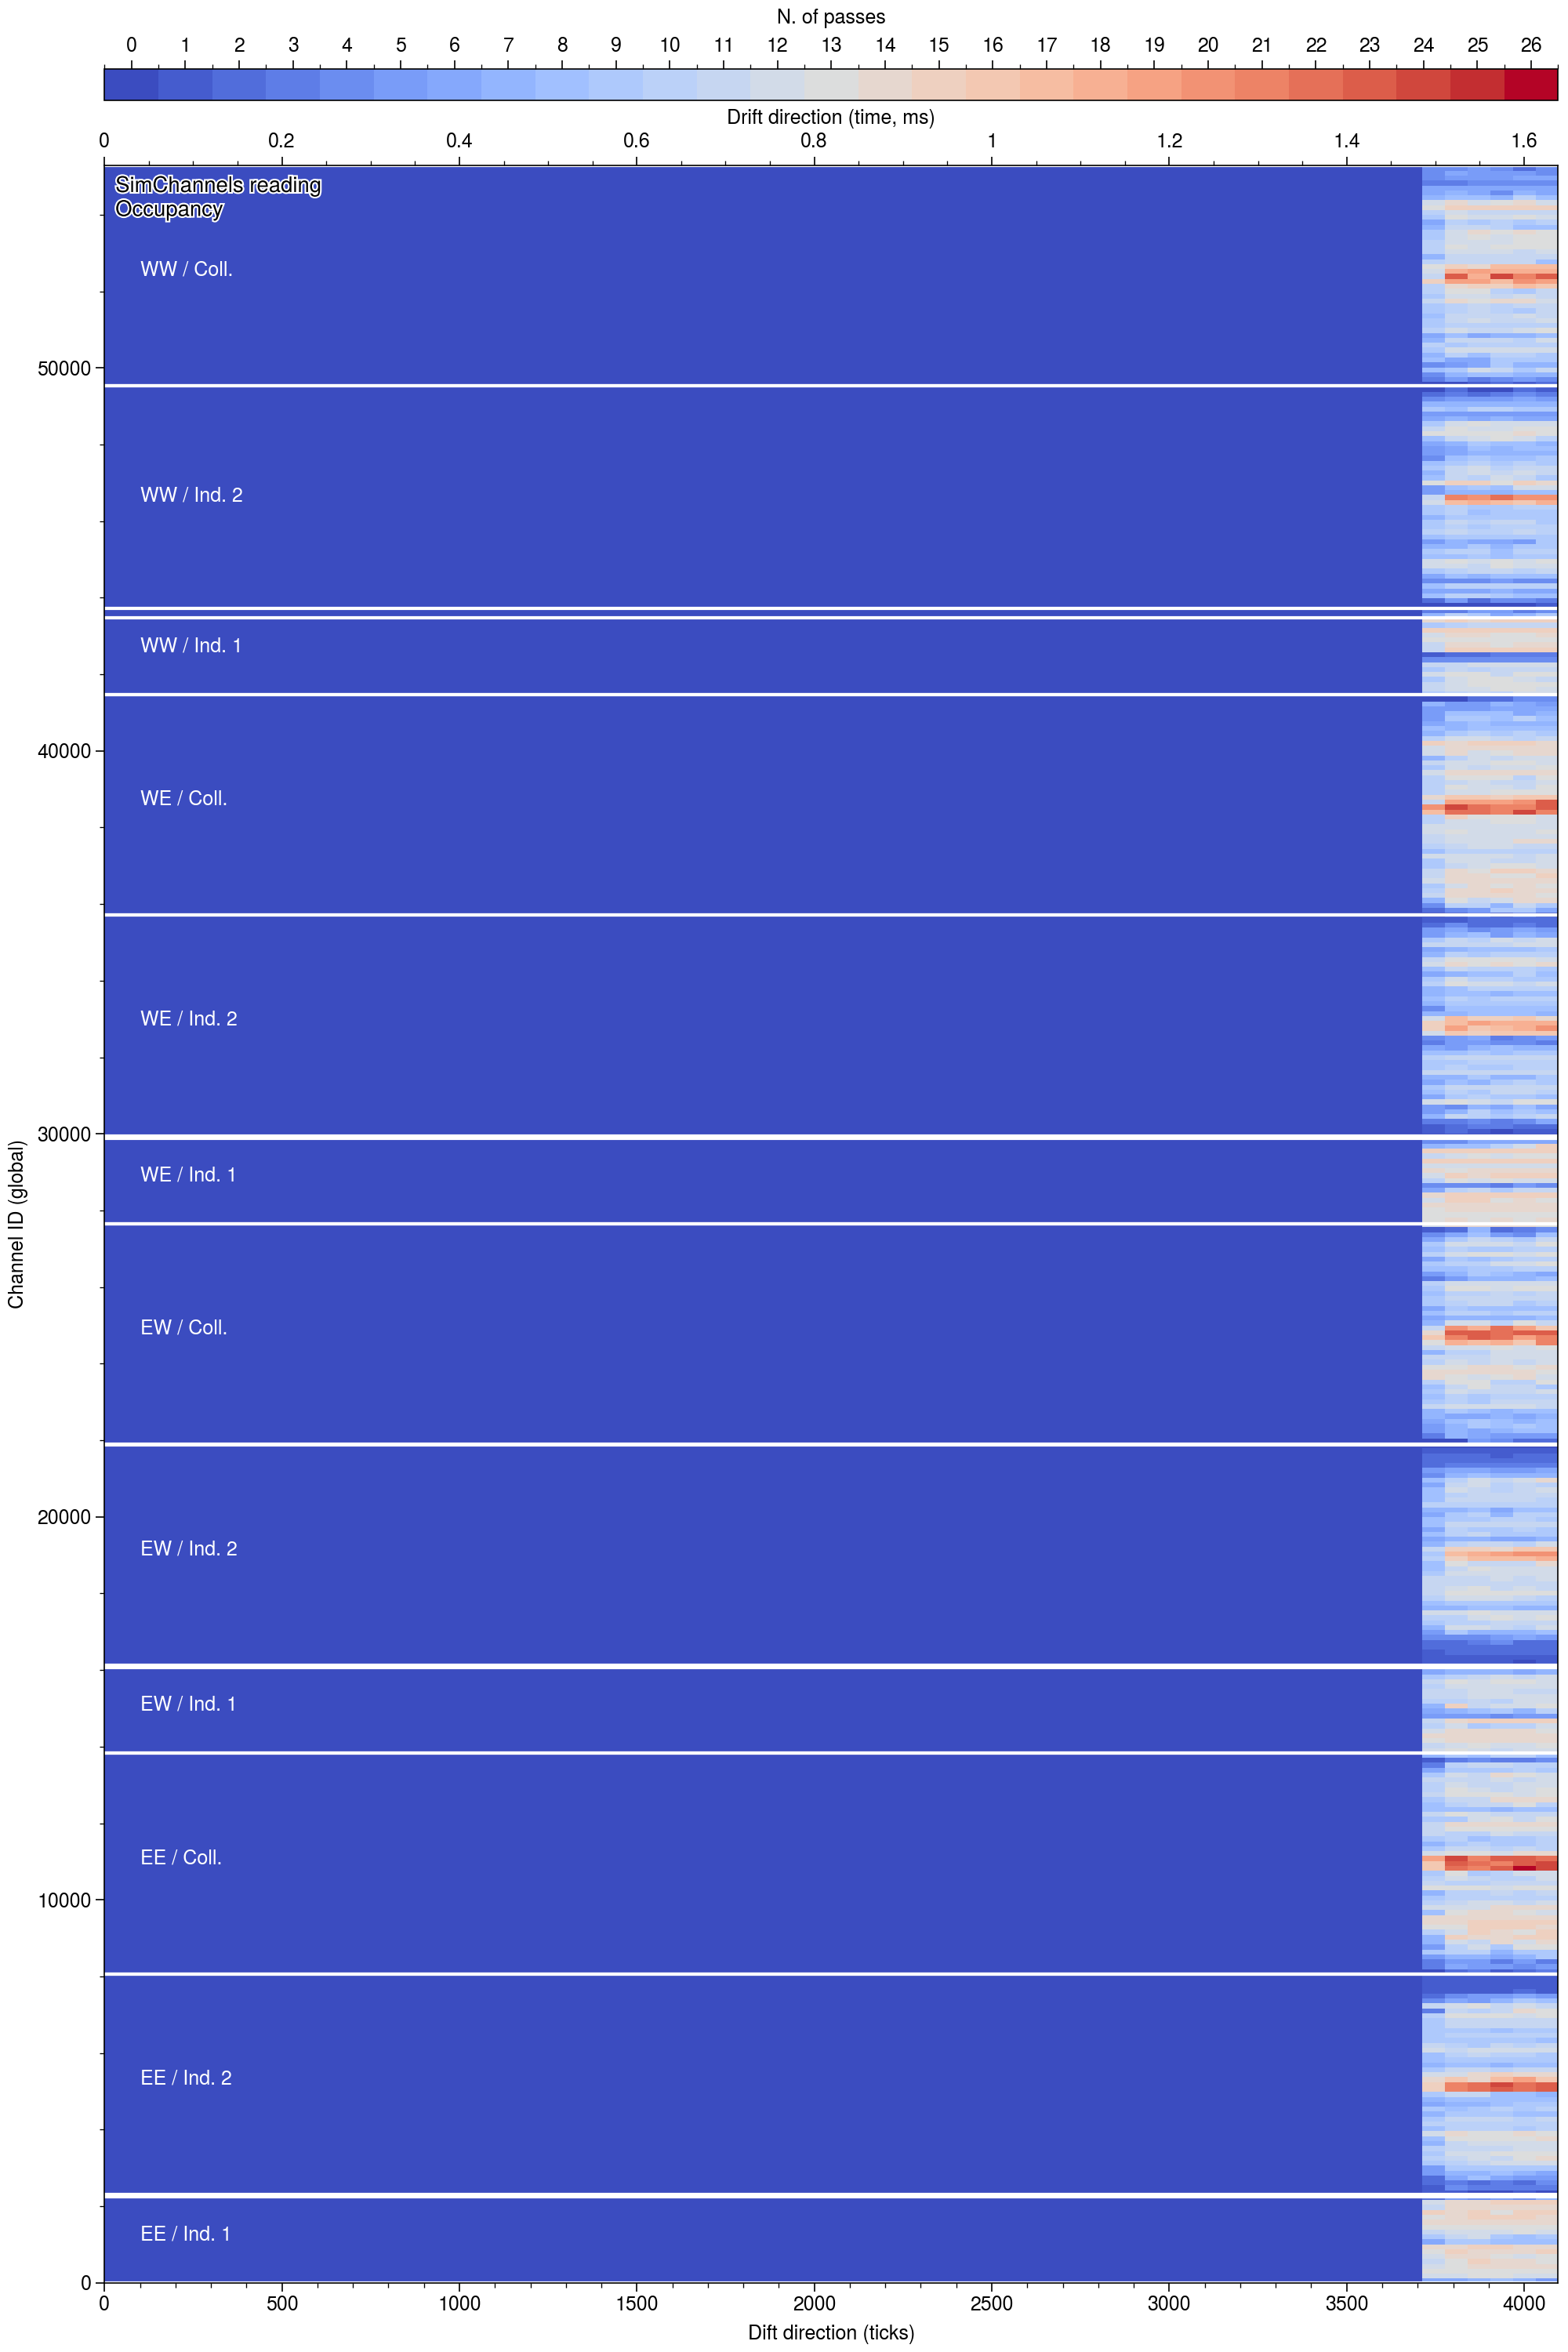

In [46]:

fig, ax = plot.subplots(width=10, height=15, ultitle='SimChannels reading\nOccupancy', ylabel='Channel ID (global)', xlabel='Dift direction (ticks)')
ax.dualx(
    lambda x: x * 0.4 / 1000,
    label='Drift direction (time, ms)',
)

hist = data[f'daq:simpleSC{0}']['yzChannelReading'].to_hist()
superImposedPlane, xedges, yedges = hist.to_numpy()
superImposedPlane = (superImposedPlane > 0).astype(int)
for i in range(1, 360):
    hist = data[f'daq:simpleSC{i}']['yzChannelReading'].to_hist()
    tmp, _, _ = hist.to_numpy()
    superImposedPlane += (tmp > 0).astype(int)

Z = superImposedPlane.T
bounds = np.arange(-0.5, Z.max() + 1.5, 1)
norm = mpl.colors.BoundaryNorm(bounds, plt.get_cmap('coolwarm').N)
m = ax.pcolormesh(xedges, yedges, Z, cmap='coolwarm', norm=norm)
ax.colorbar(m, ticks=np.arange(Z.max() + 1), loc='t', label='N. of passes')

for k in channel_map:
    for k2 in channel_map[k]:
        for value in channel_map[k][k2]:
            ax.axhline(value, color='w')
            print(value)
        ax.text(100, np.mean(channel_map[k][k2]), f'{k} / {k2}', c='w')

fig.savefig('allSimChannels.pdf')

/Users/msotgia/dev_areas/py_envs/sbn-cup-dev/lib/python3.13/site-packages/mplhep/utils.py:365: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  _plottable.errors(assume_variances_equal_values=True)
/Users/msotgia/dev_areas/py_envs/sbn-cup-dev/lib/python3.13/site-packages/mplhep/utils.py:365: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  _plottable.errors(assume_variances_equal_values=True)
/Users/msotgia/dev_areas/py_envs/sbn-cup-dev/lib/python3.13/site-packages/mplhep/utils.py:365: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  _plottable.errors(assume_variances_equal_values=True)
/Users/msotgia/dev_areas/py_envs/sbn-cup-dev/lib/python3.13/site-pa

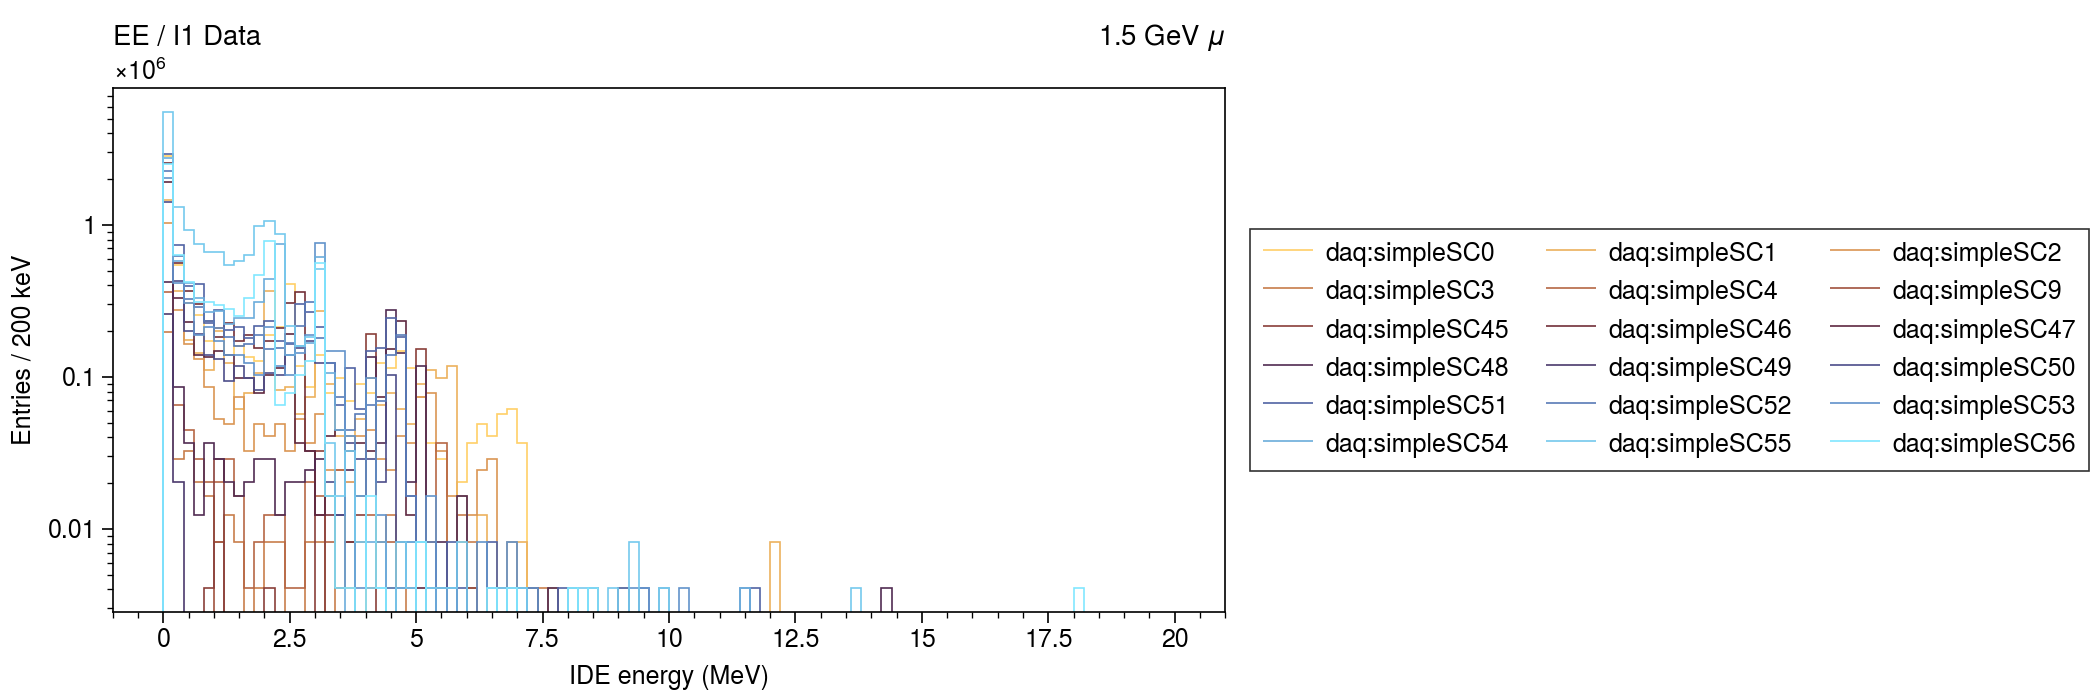

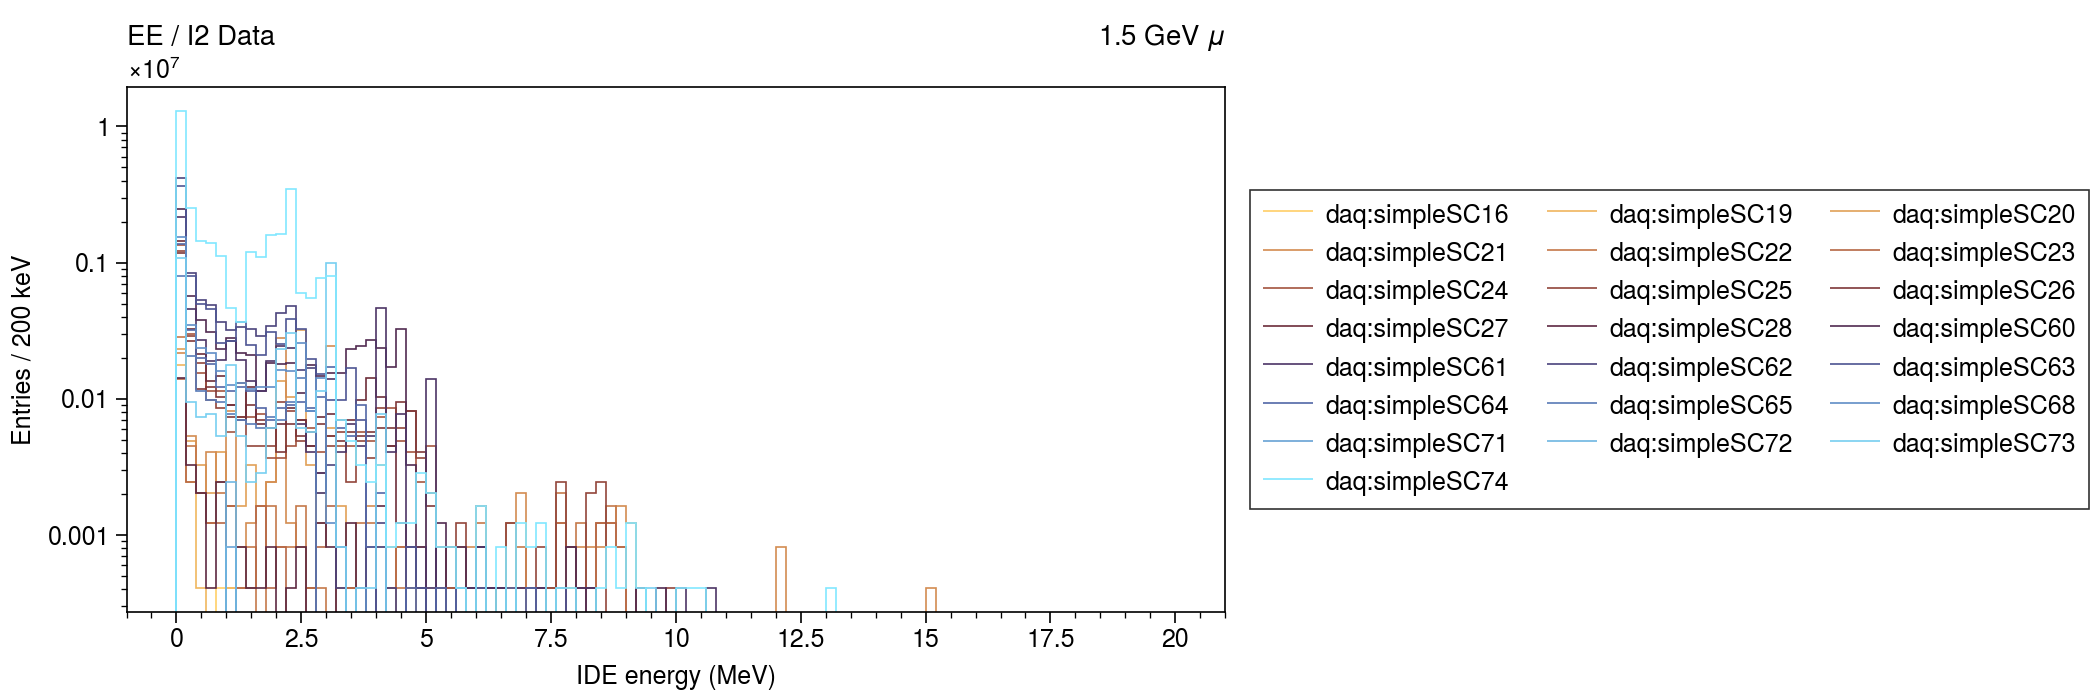

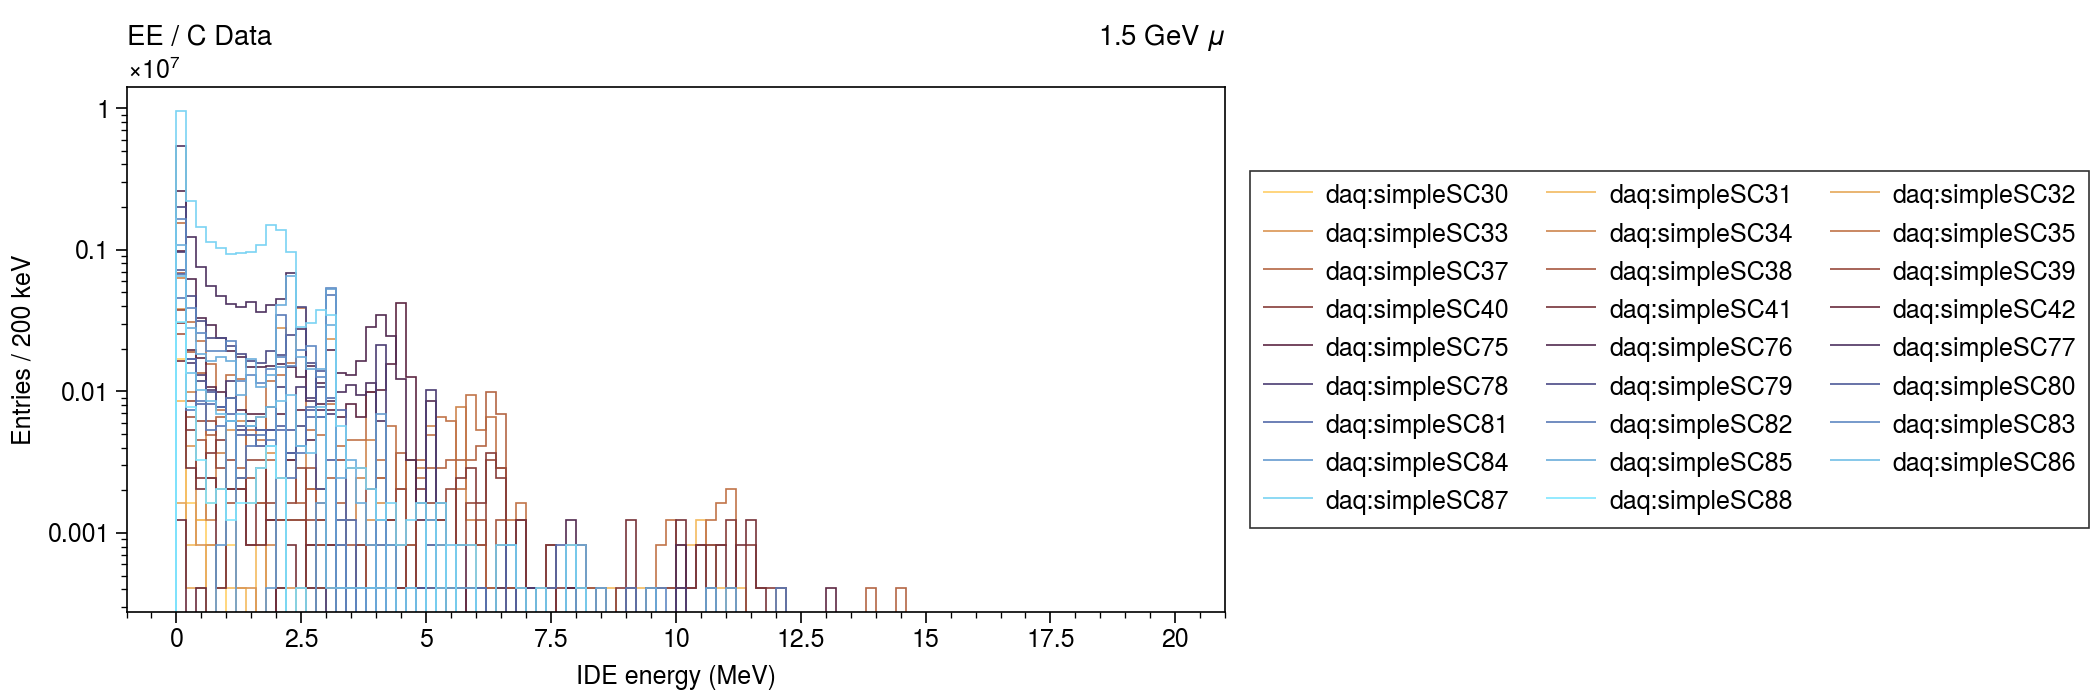

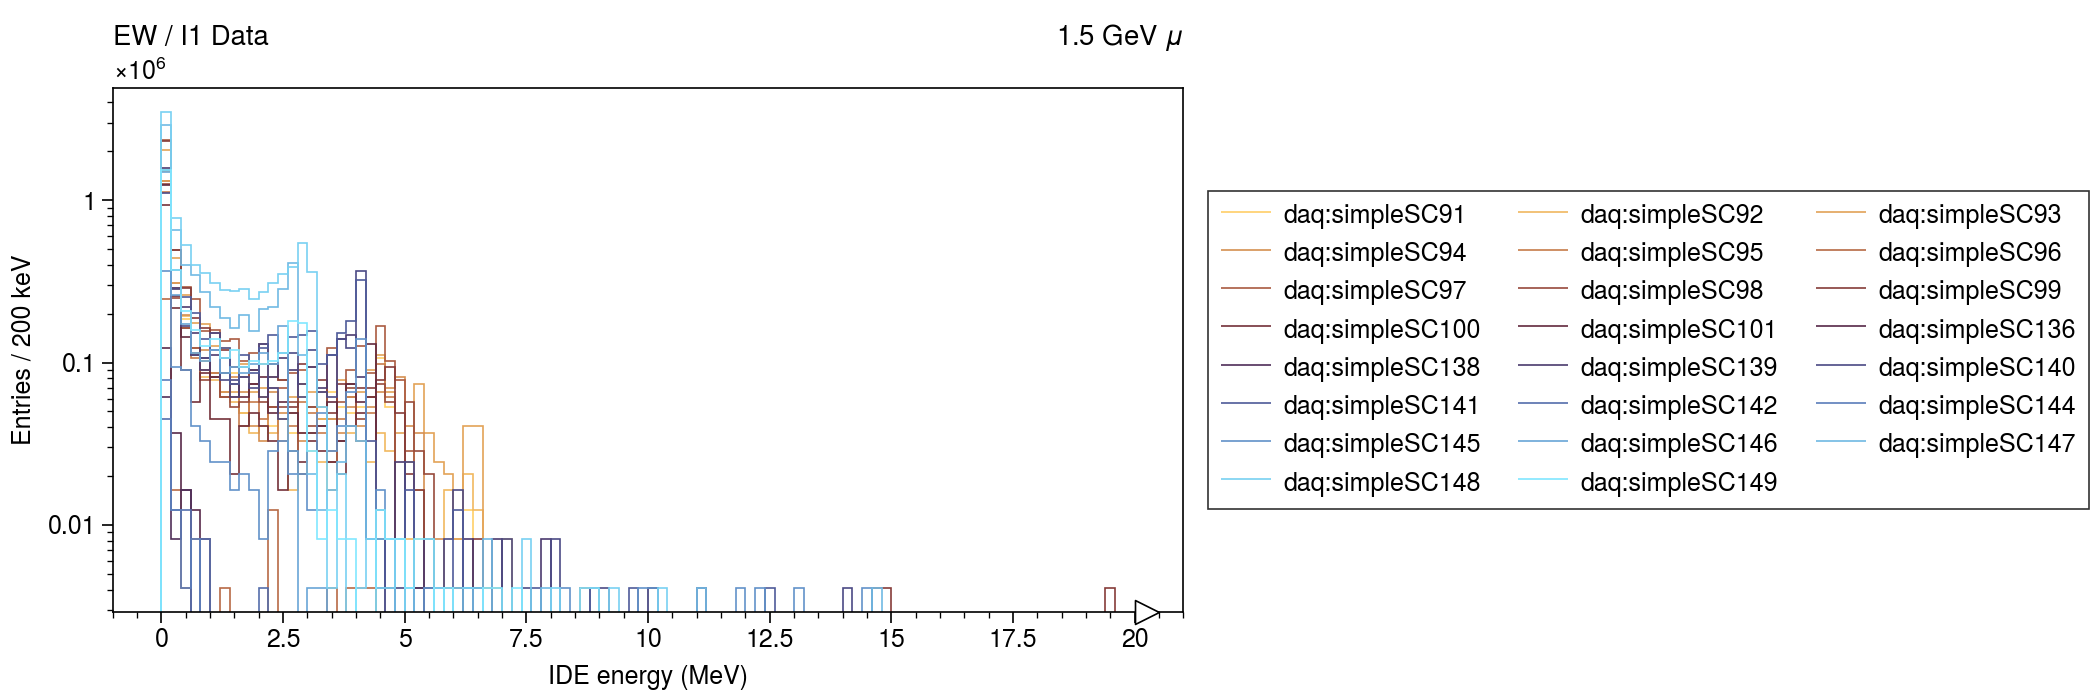

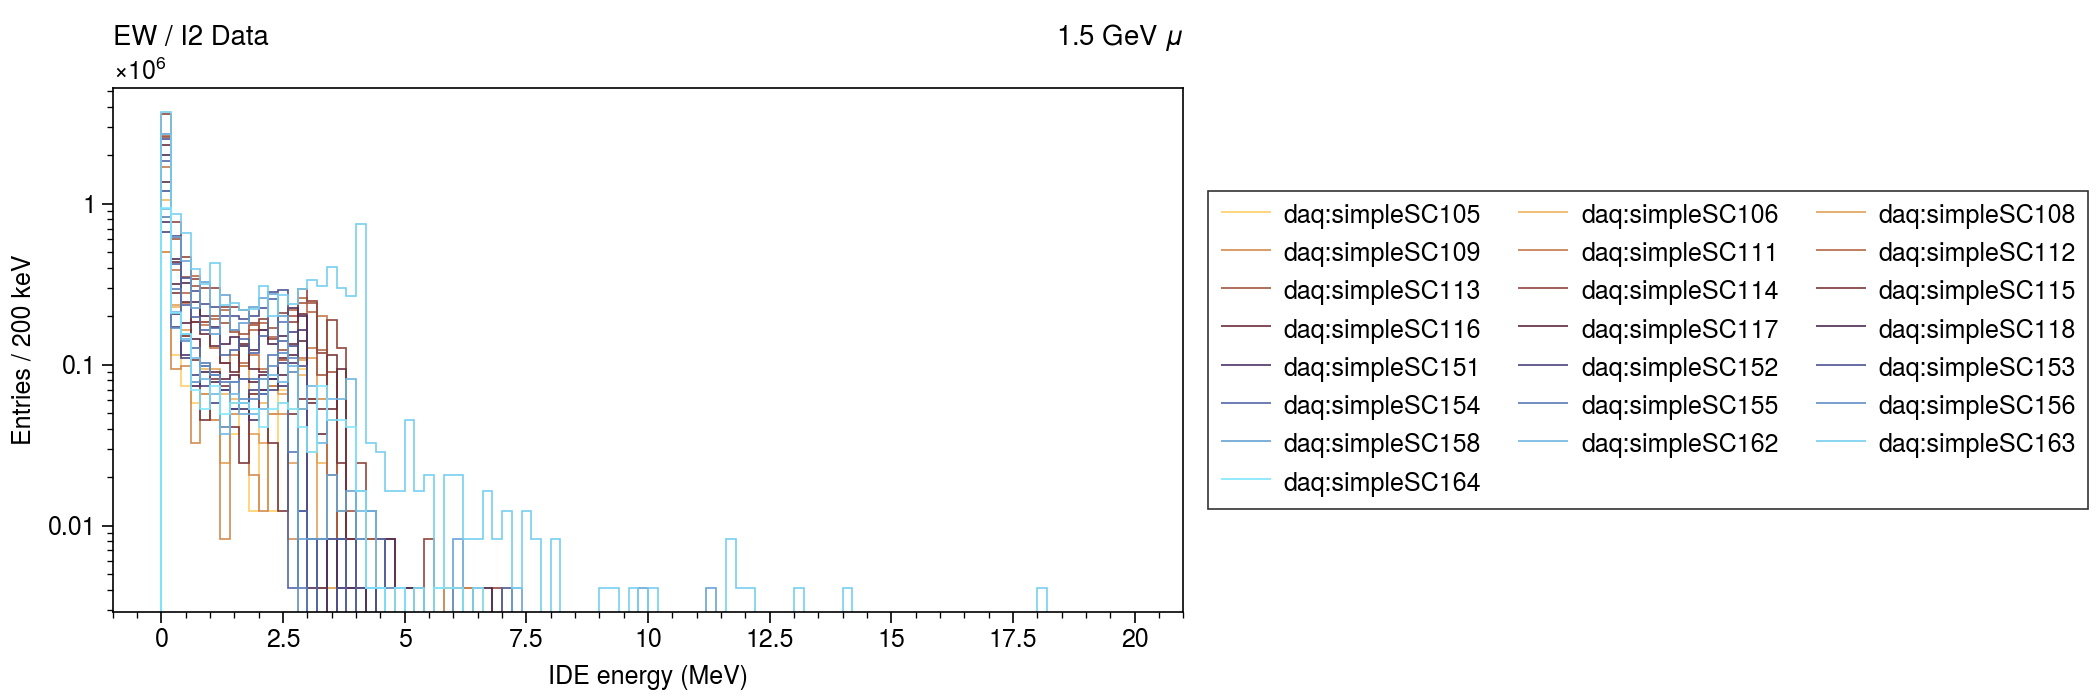

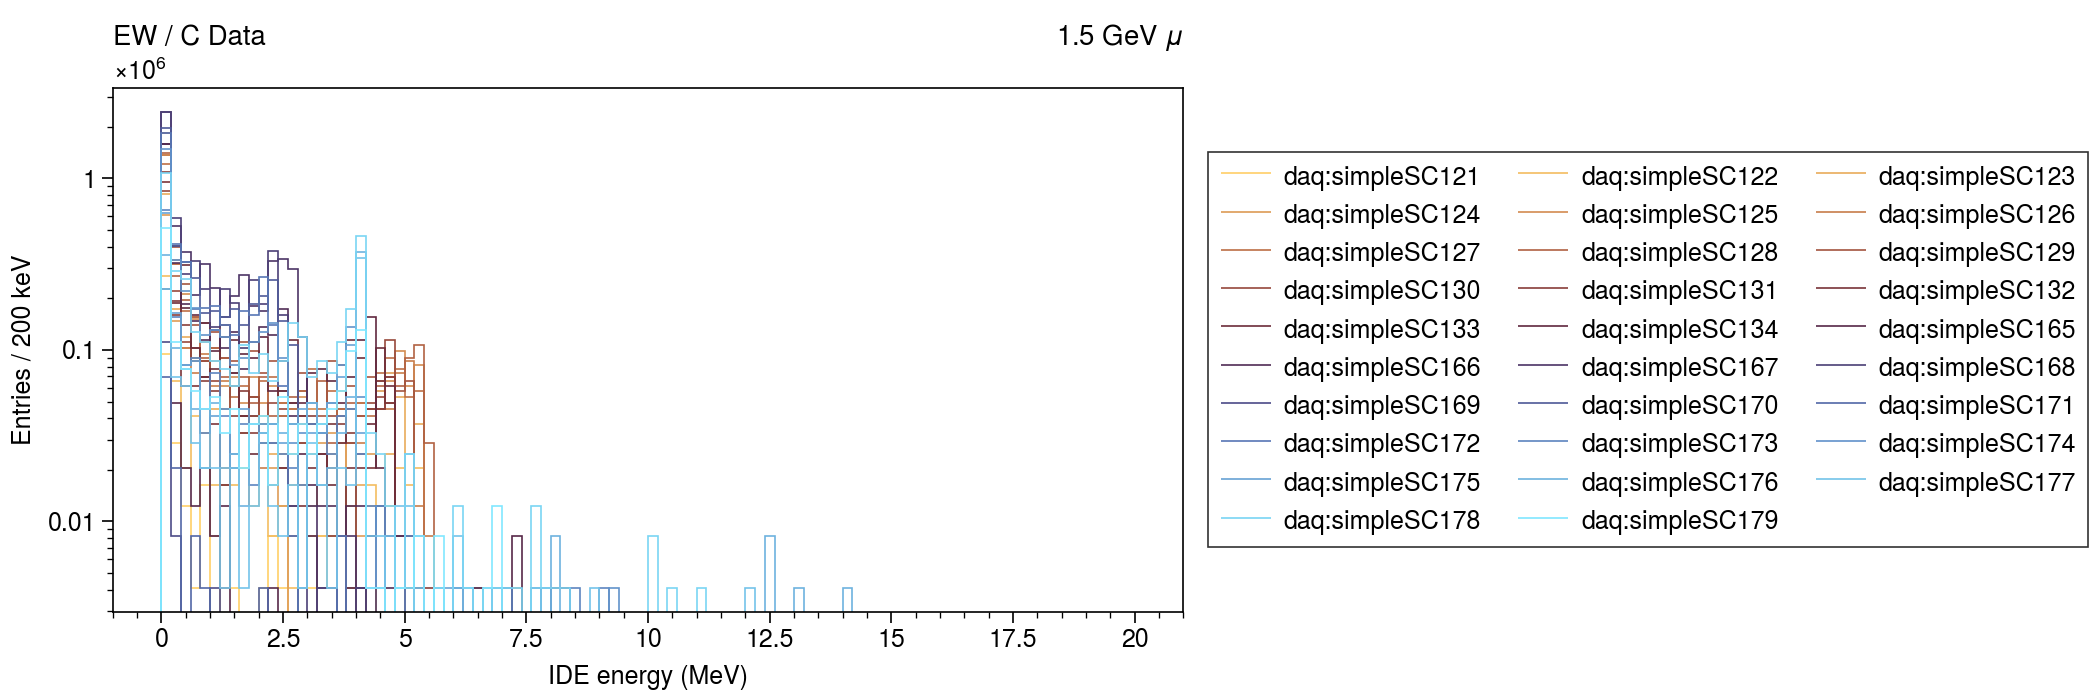

In [95]:

data = uproot.open('yz_simulation_debug_muondata_addedEnergyHist.root')
planeSC_map = defaultdict(list)
for i in range(360):
    if data[f'daq:simpleSC{i}'].keys():
        planeSC_map[data[f'daq:simpleSC{i}'].keys()[-1].split(';')[0]].append(f'daq:simpleSC{i}')



for plane in ['EE', 'EW']:
    for view in ['I1', 'I2', 'C']:
        fig, axs = plot.subplots(
            width=10.5, height=3.5,
            xlabel='IDE energy (MeV)', ylabel='Entries / 200 keV',
            ltitle=f'{plane} / {view} Data', rtitle=f'1.5 GeV $\\mu$'
        )

        plane_view = f'{plane}_{view}_Energy'
        scale_colors = plt.cm.managua(np.linspace(0, 1, len(planeSC_map[plane_view])))
        for i, key in enumerate(planeSC_map[plane_view]):
            hist = data[key][plane_view].to_hist()
            hep.histplot(hist, yerr=False, ax=axs[0], label=key, color=tuple(scale_colors[i]))

        axs.format(yscale='log',)
        fig.legend()
        fig.savefig(f'muon_1.5GeV_plot_{plane}_{view}_ideEnergy.pdf')
            


/var/folders/rz/xbjc5djs43l2yfd7lq67www80000gn/T/ipykernel_64543/2236155749.py:19: UltraPlotWarning: Ignoring unused keyword arg(s): {'vmin': -0.5, 'vmax': 1.5}
  m = ax.pcolormesh(xedges, yedges, Z, cmap='coolwarm', norm=norm)


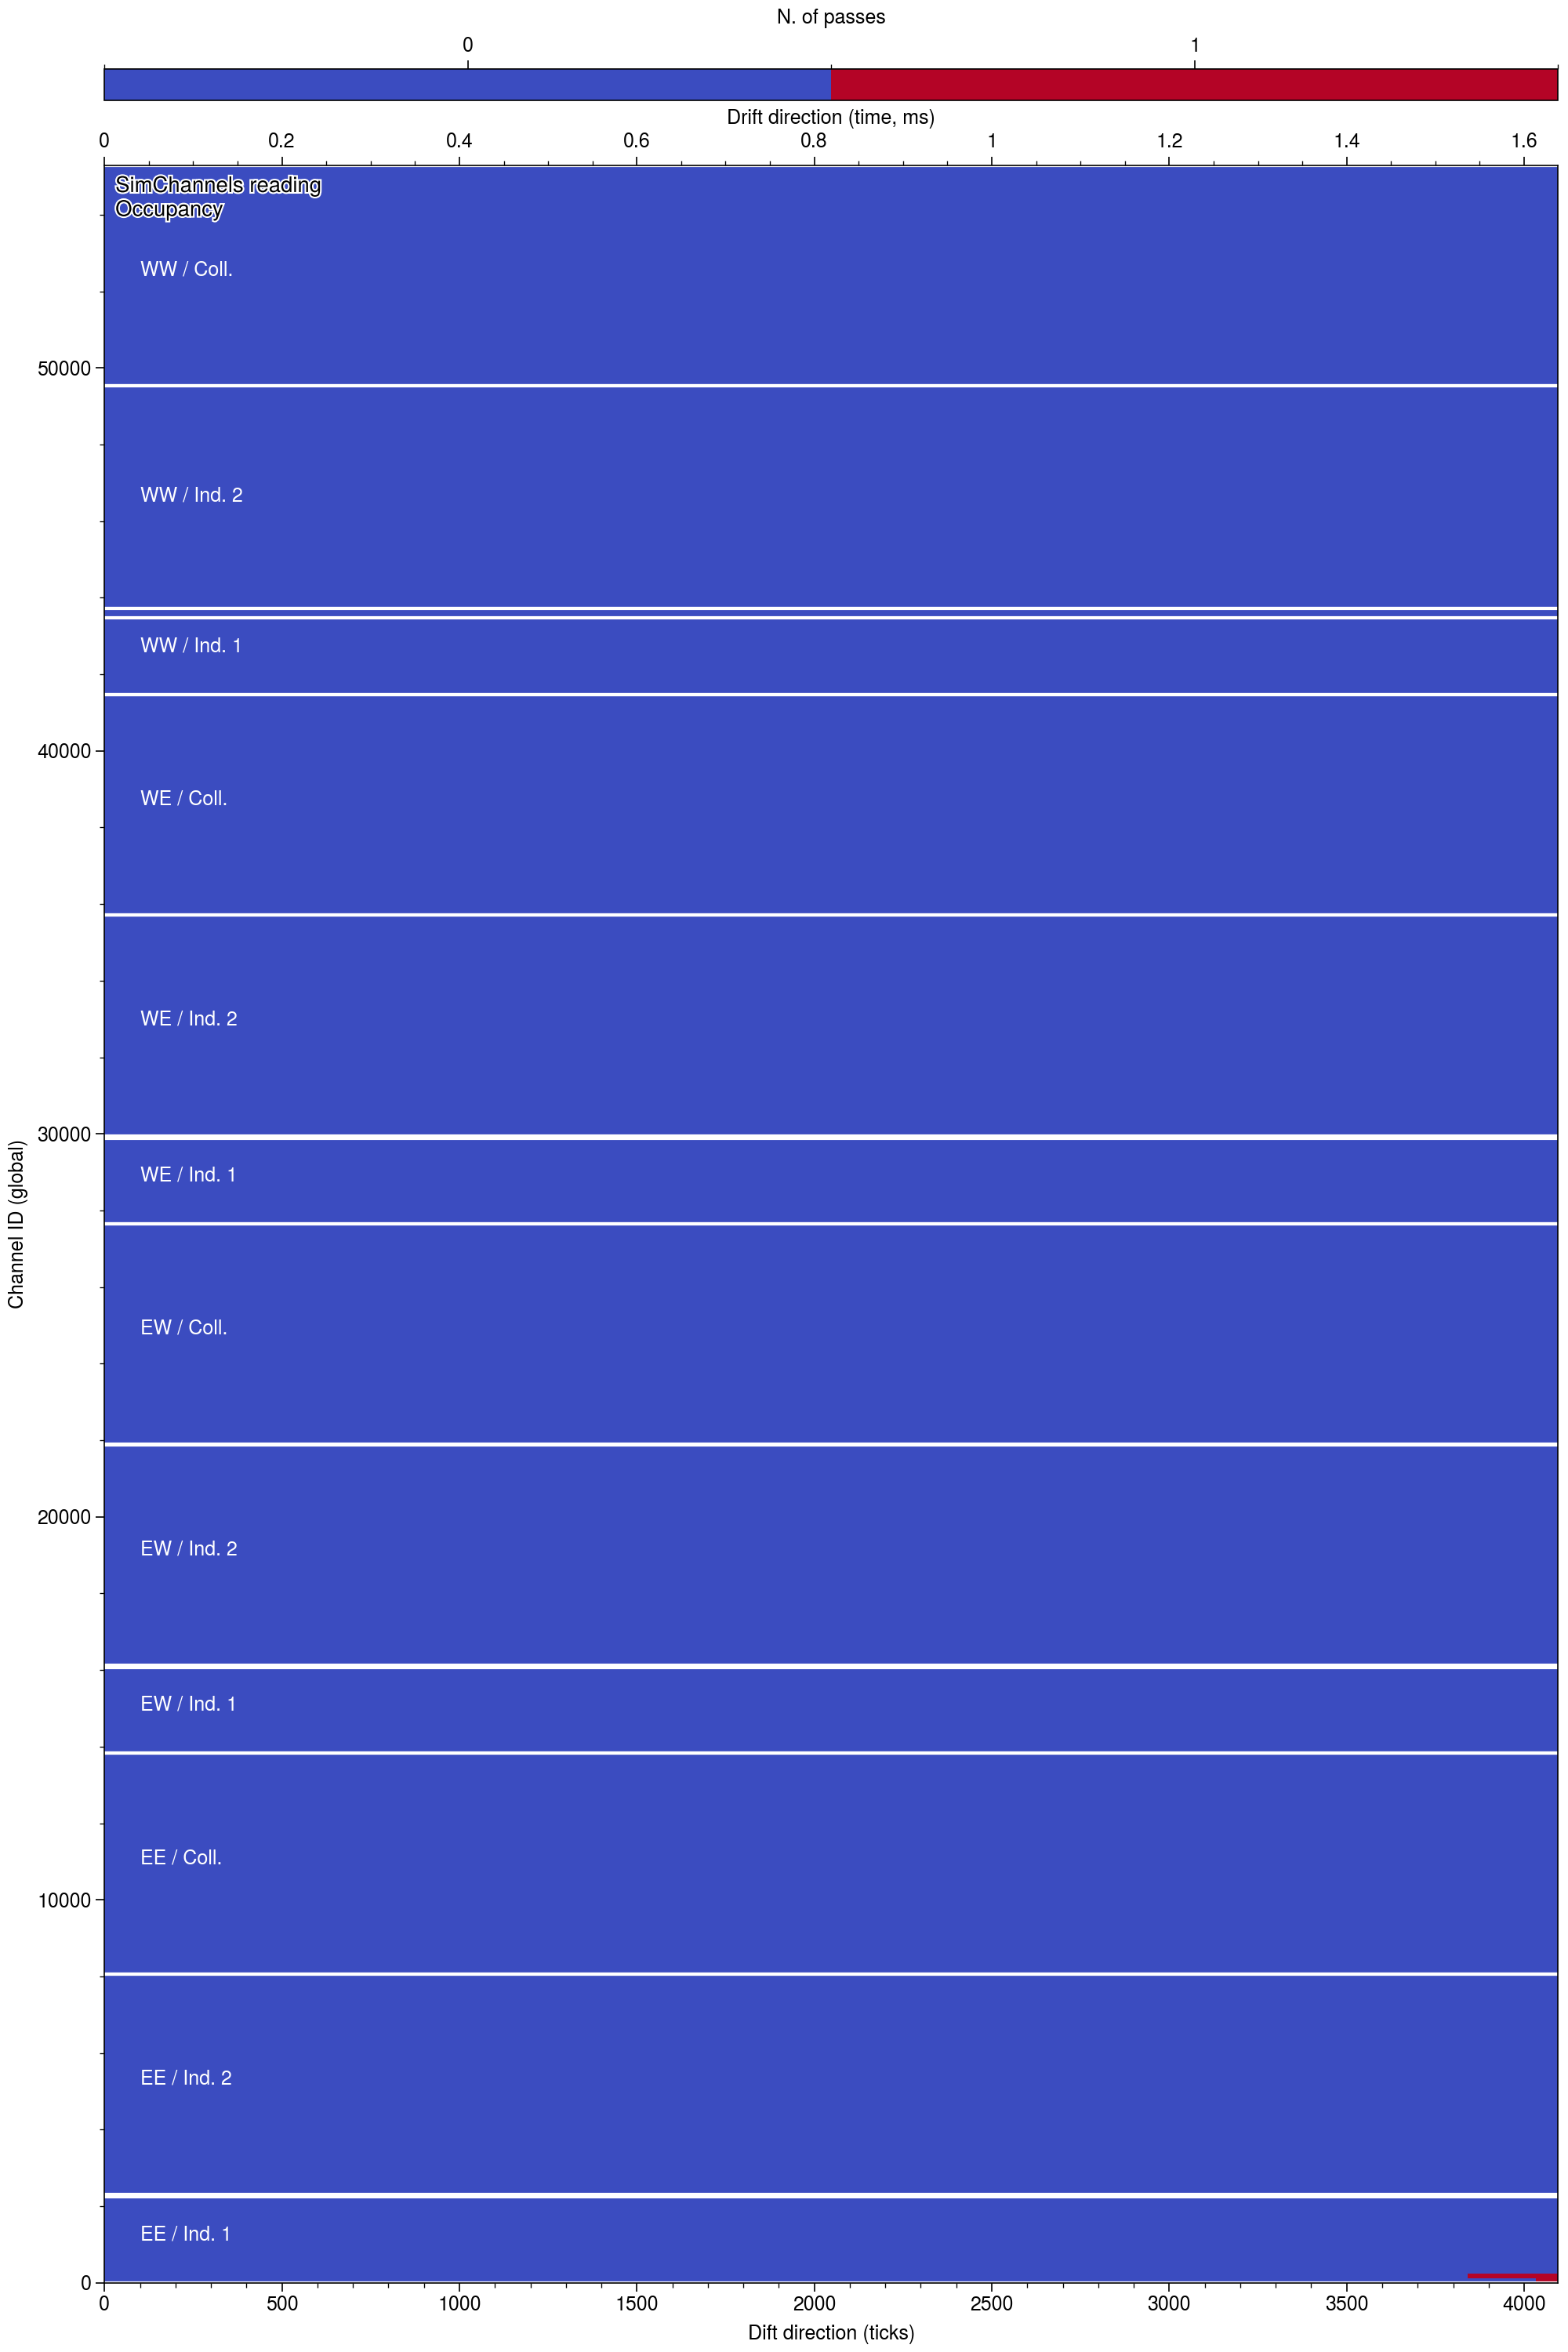

In [70]:
fig, ax = plot.subplots(width=10, height=15, ultitle='SimChannels reading\nOccupancy', ylabel='Channel ID (global)', xlabel='Dift direction (ticks)')
ax.dualx(
    lambda x: x * 0.4 / 1000,
    label='Drift direction (time, ms)',
)

hist = data[f'daq:simpleSC{0}']['yzChannelReading'].to_hist()
superImposedPlane, xedges, yedges = hist.to_numpy()
superImposedPlane = (superImposedPlane > 0).astype(int)
for i in range(1, 360):
    if 'yzChannelReading' in data[f'daq:simpleSC{i}'].keys():
        hist = data[f'daq:simpleSC{i}']['yzChannelReading'].to_hist()
        tmp, _, _ = hist.to_numpy()
        superImposedPlane += (tmp > 0).astype(int)

Z = superImposedPlane.T
bounds = np.arange(-0.5, Z.max() + 1.5, 1)
norm = mpl.colors.BoundaryNorm(bounds, plt.get_cmap('coolwarm').N)
m = ax.pcolormesh(xedges, yedges, Z, cmap='coolwarm', norm=norm)
ax.colorbar(m, ticks=np.arange(Z.max() + 1), loc='t', label='N. of passes')

for k in channel_map:
    for k2 in channel_map[k]:
        for value in channel_map[k][k2]:
            ax.axhline(value, color='w')
        ax.text(100, np.mean(channel_map[k][k2]), f'{k} / {k2}', c='w')

fig.savefig('allSimChannels.pdf')

/Users/msotgia/dev_areas/py_envs/sbn-cup-dev/lib/python3.13/site-packages/mplhep/utils.py:365: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  _plottable.errors(assume_variances_equal_values=True)
/Users/msotgia/dev_areas/py_envs/sbn-cup-dev/lib/python3.13/site-packages/mplhep/utils.py:365: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  _plottable.errors(assume_variances_equal_values=True)
/Users/msotgia/dev_areas/py_envs/sbn-cup-dev/lib/python3.13/site-packages/mplhep/utils.py:365: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  _plottable.errors(assume_variances_equal_values=True)
/Users/msotgia/dev_areas/py_envs/sbn-cup-dev/lib/python3.13/site-pa

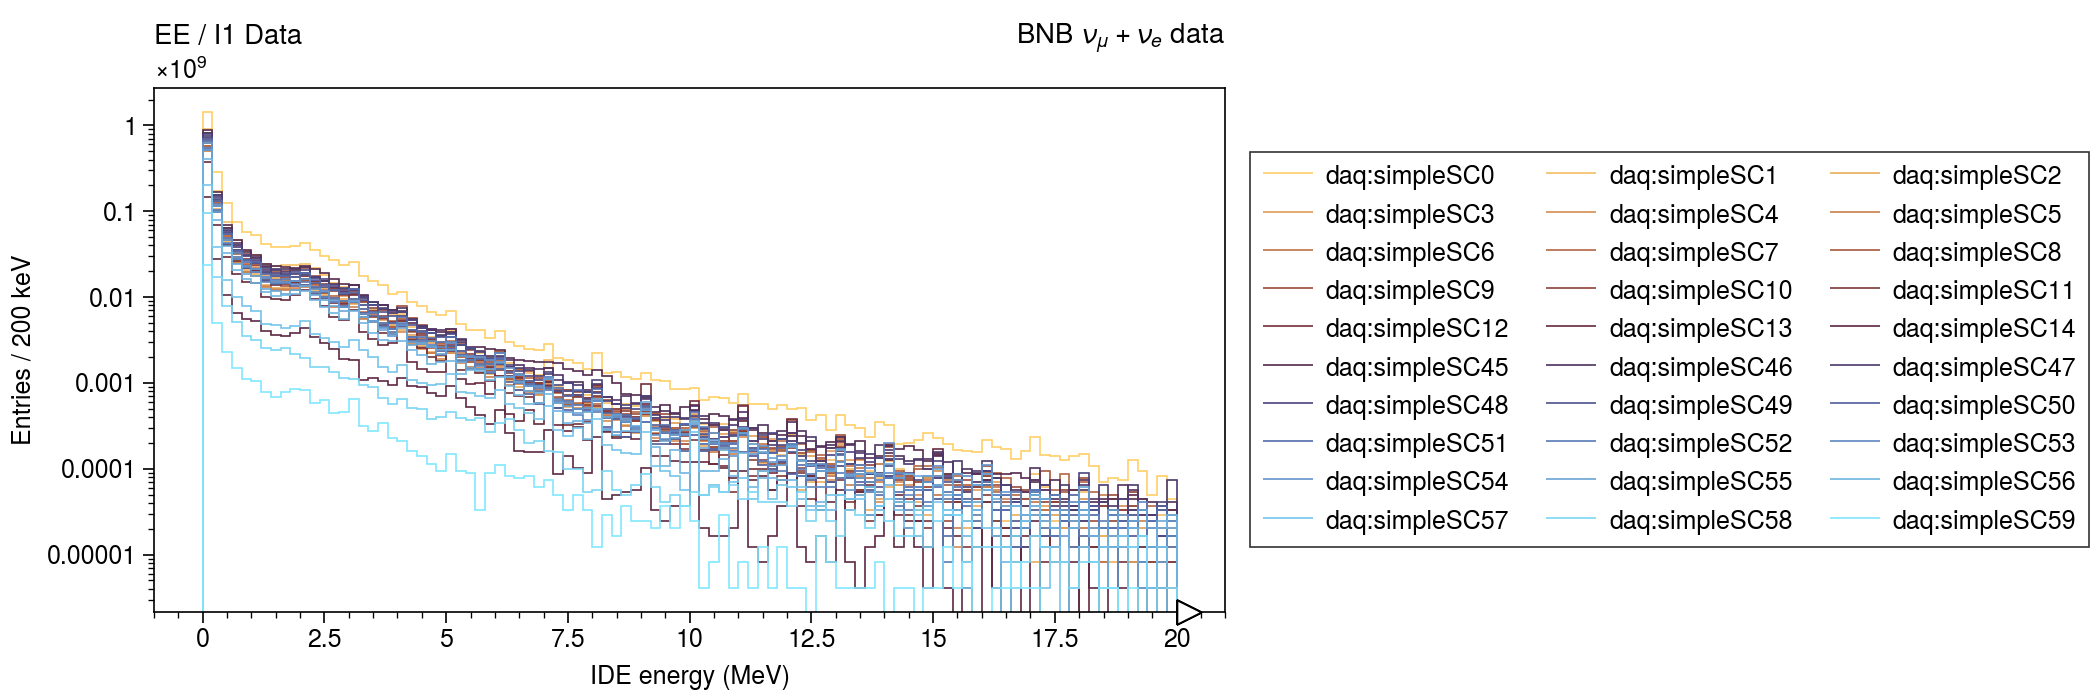

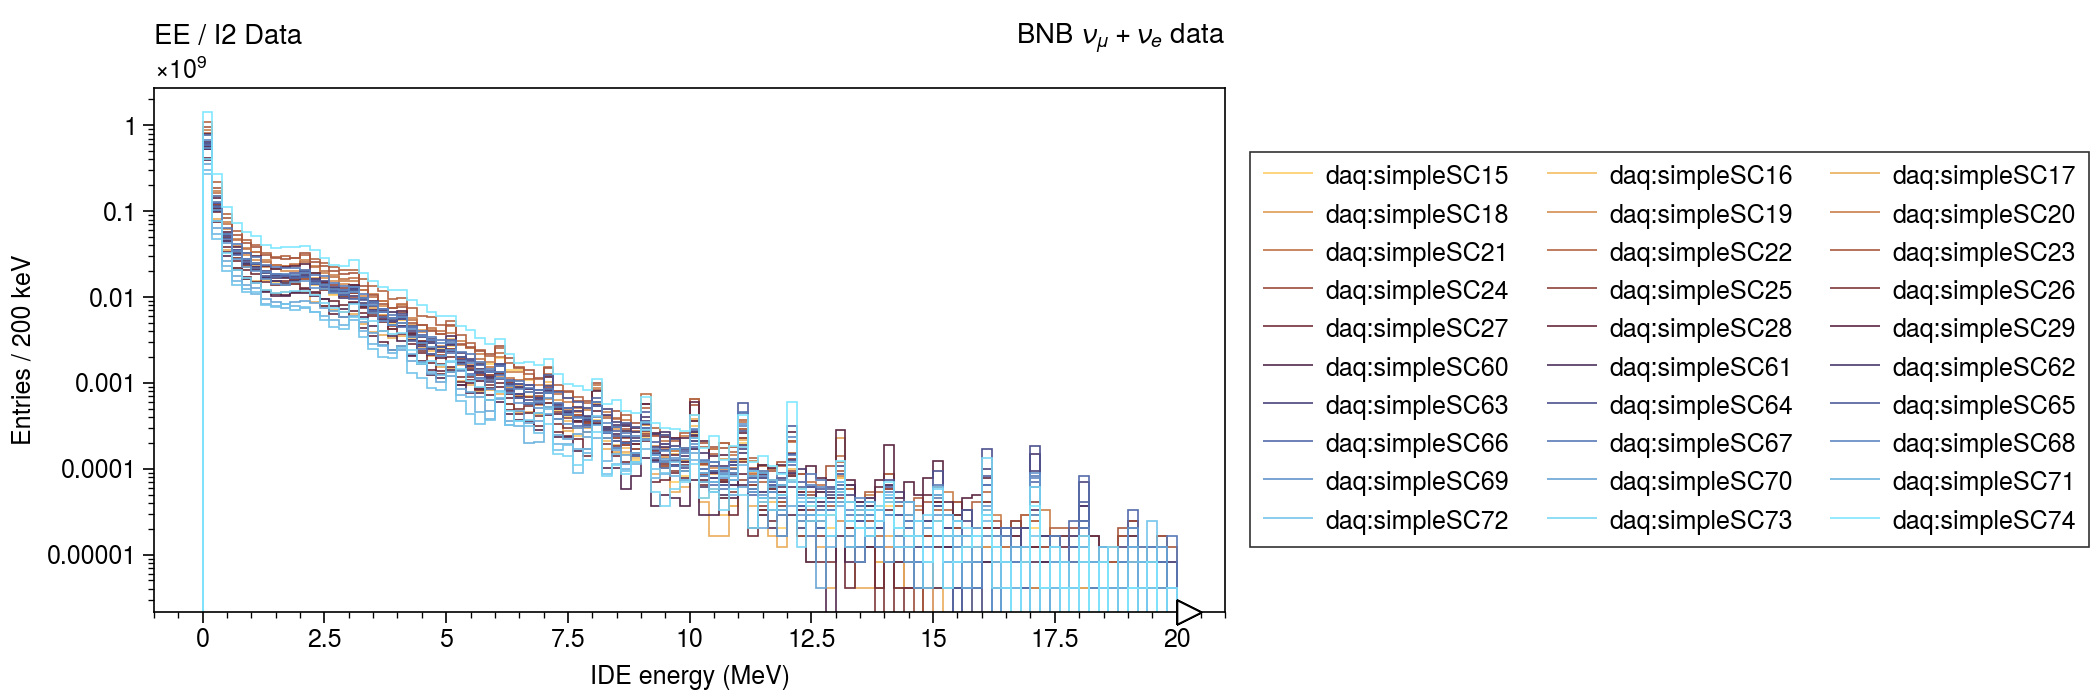

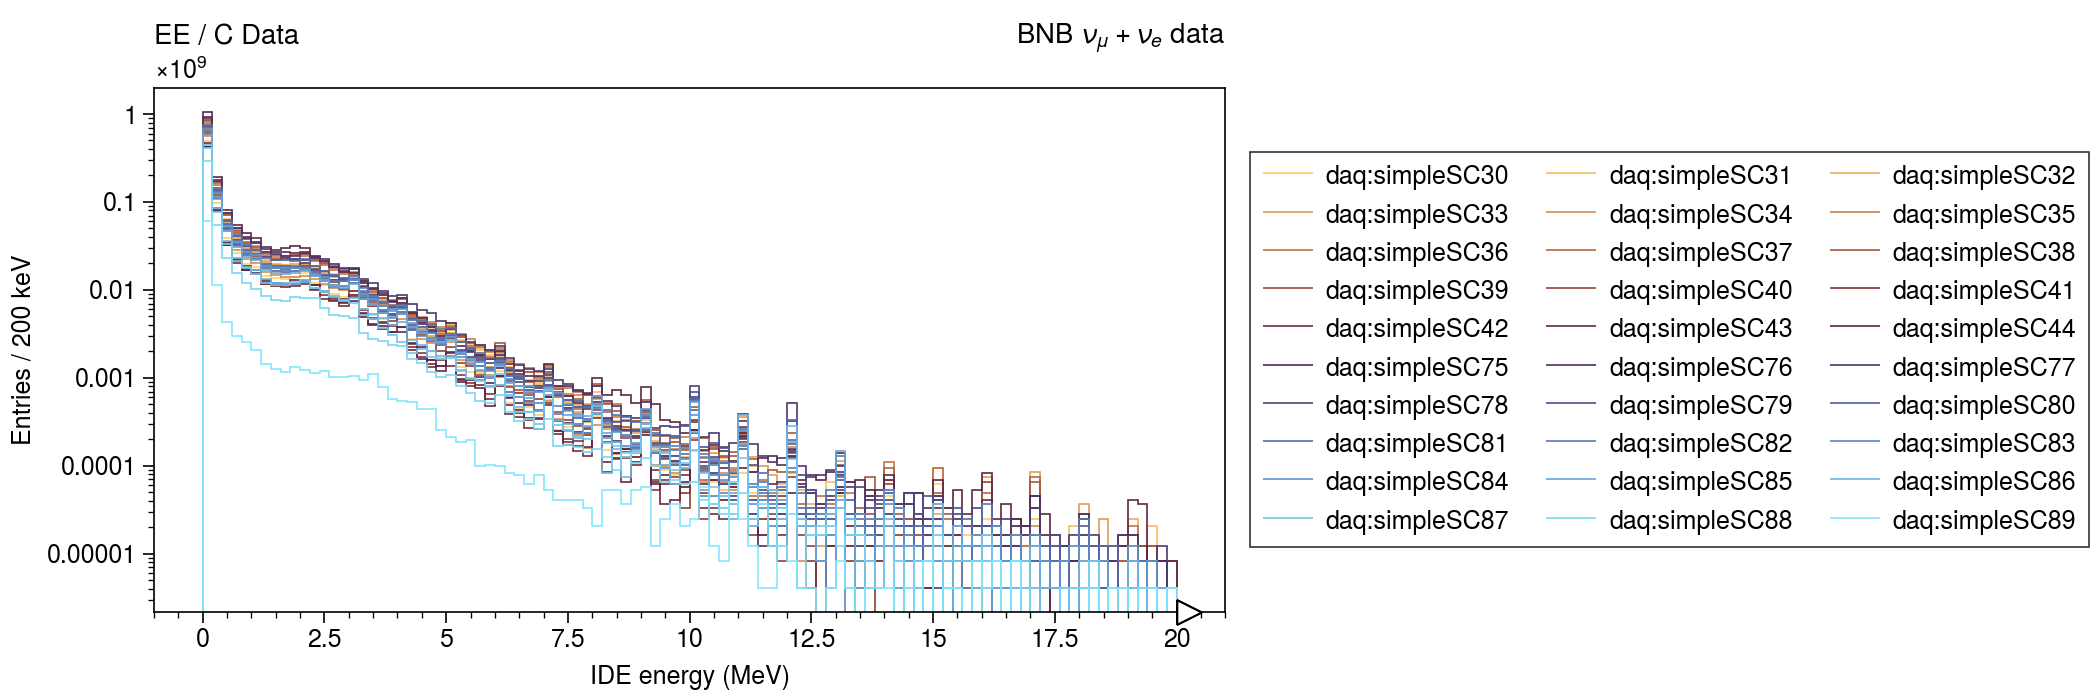

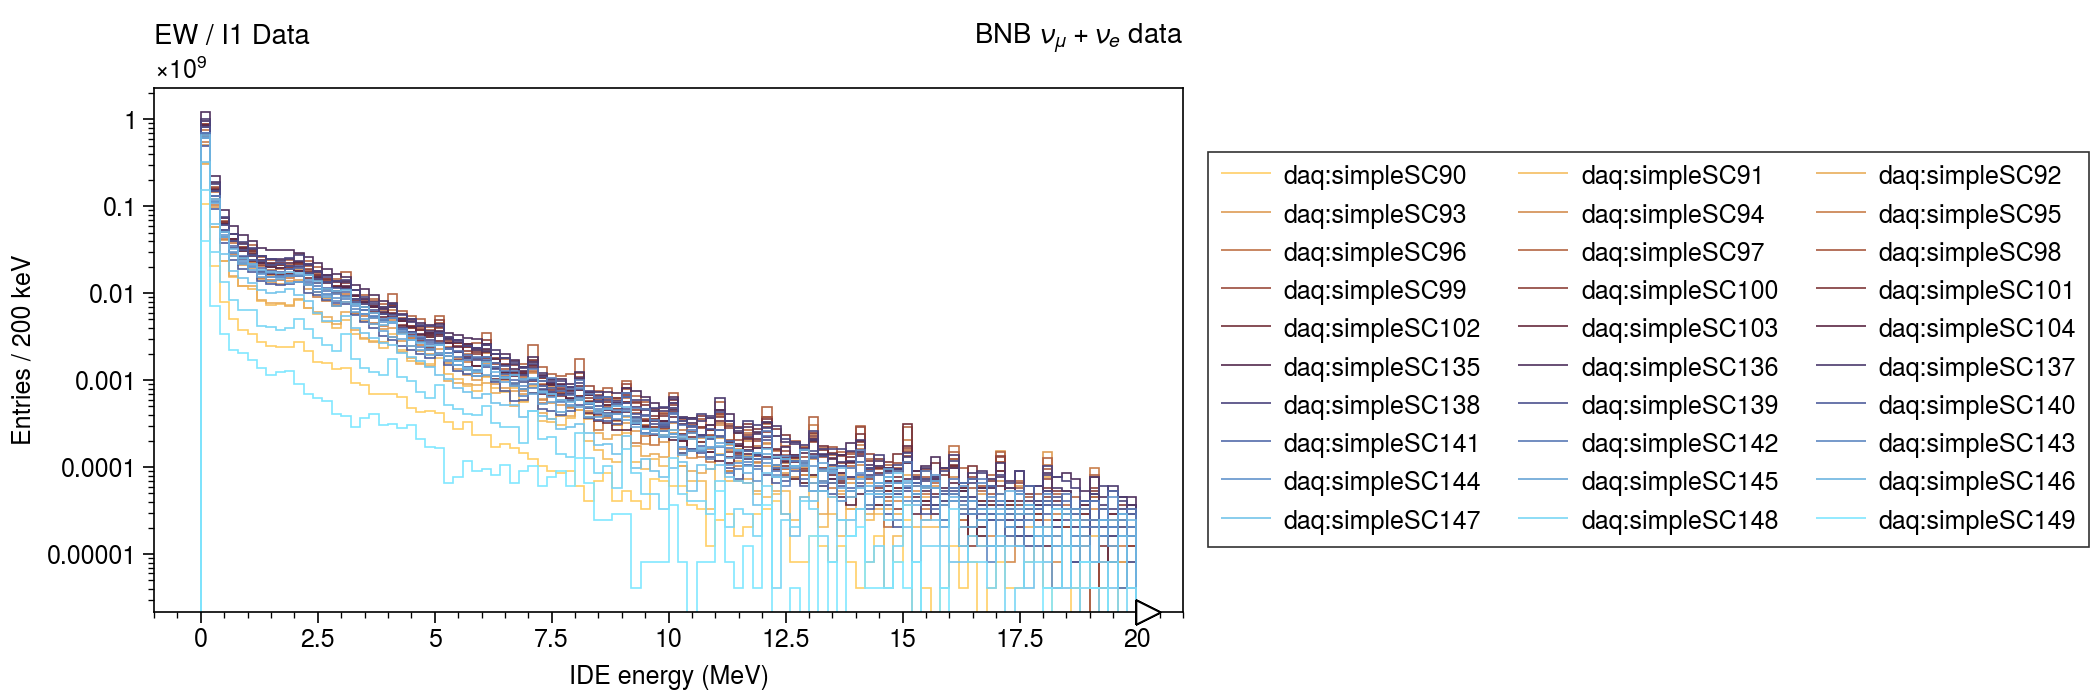

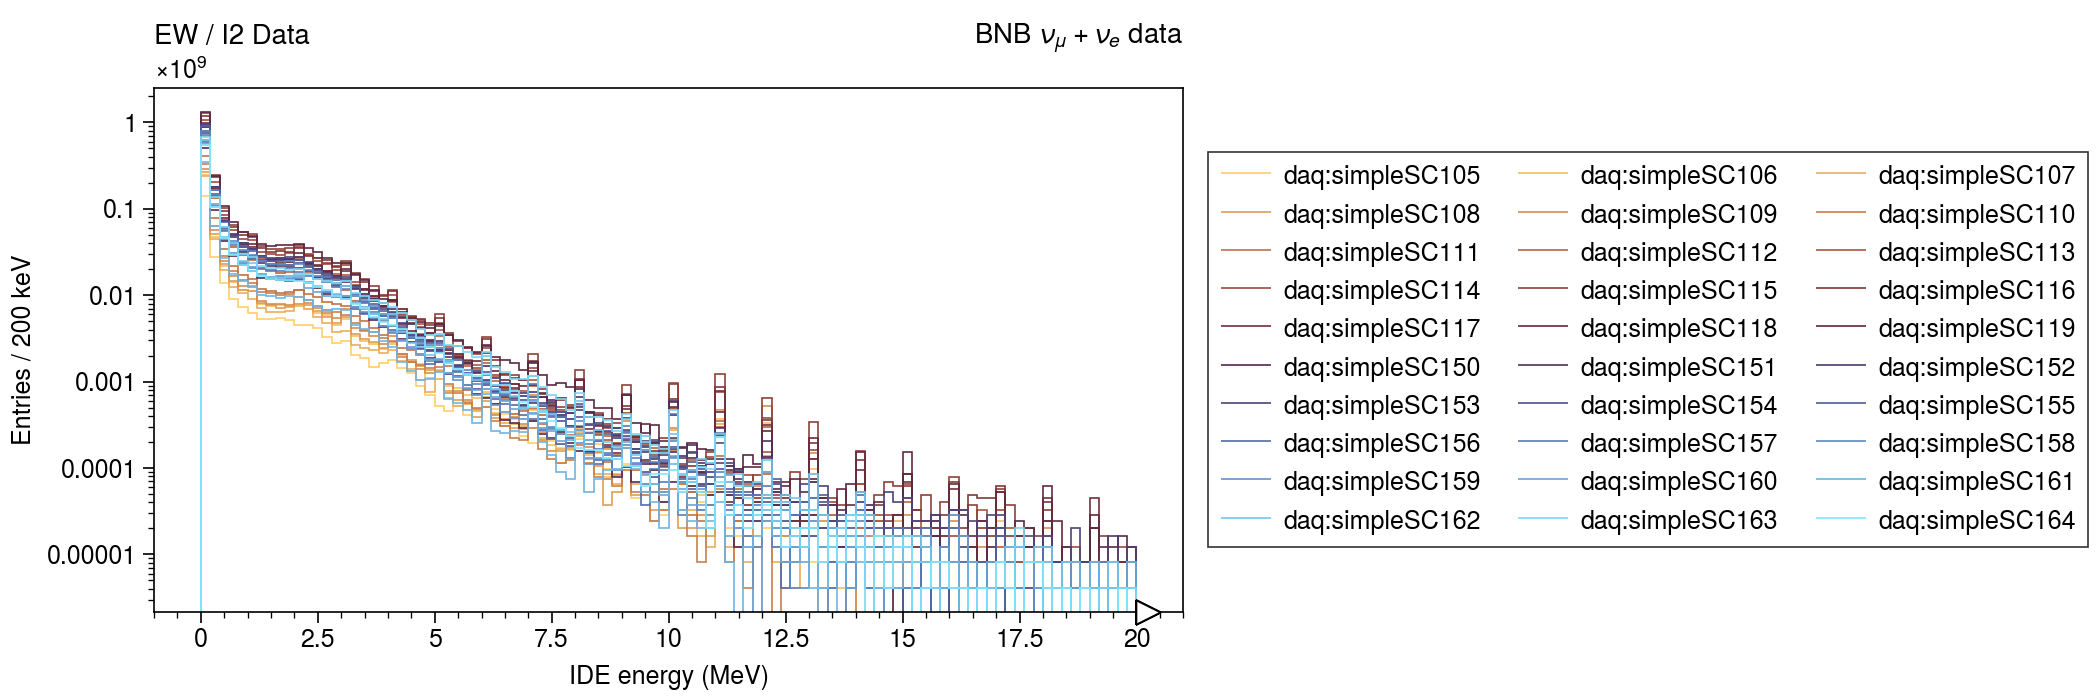

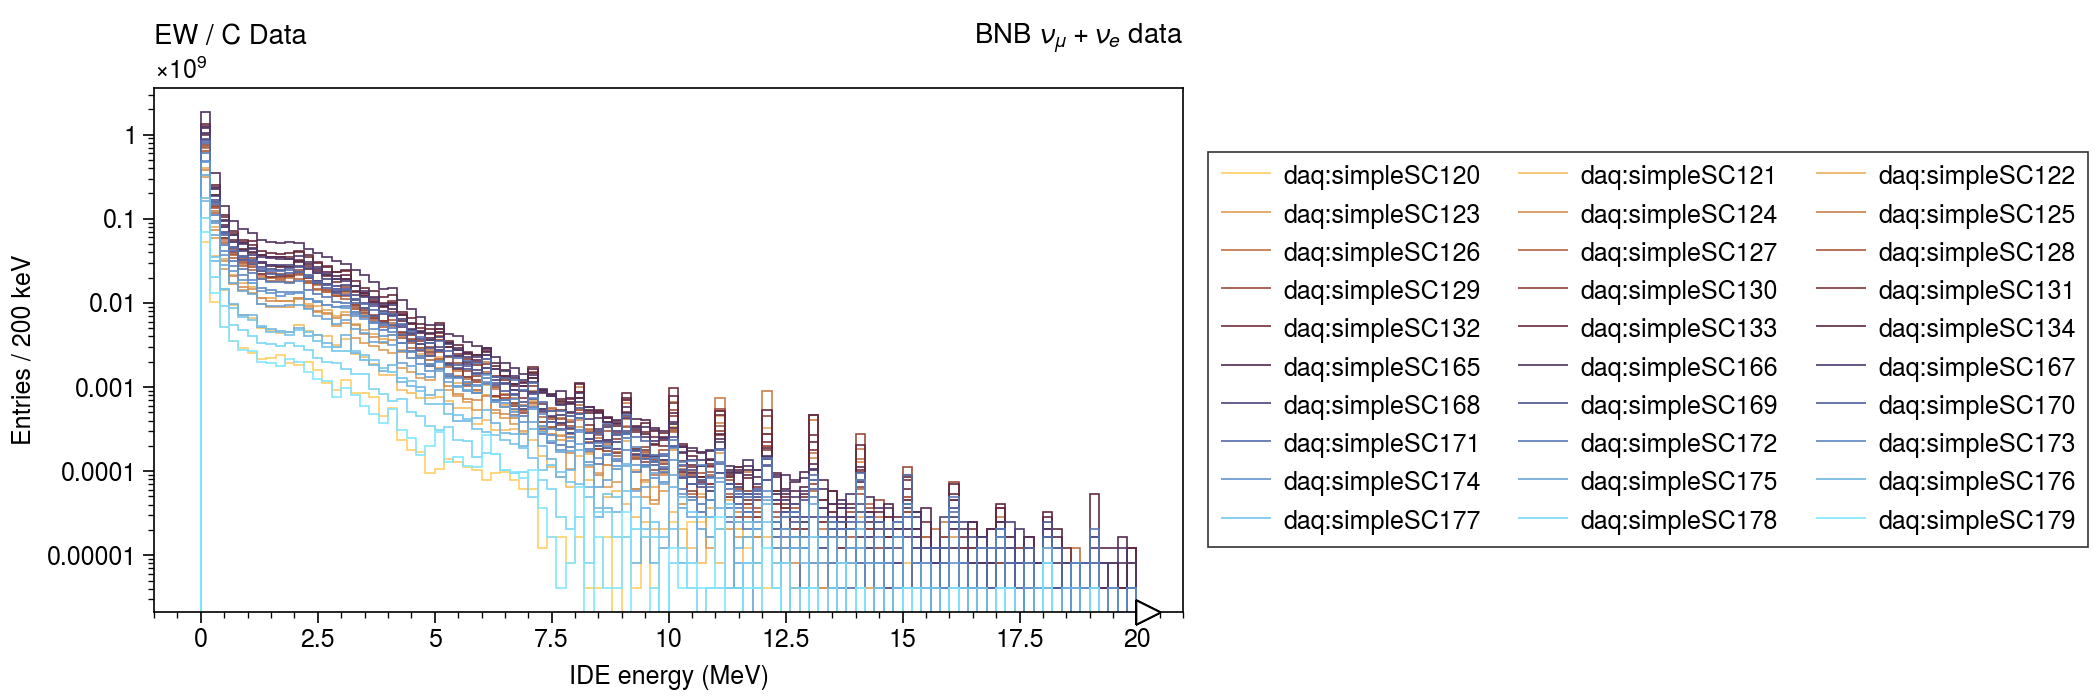

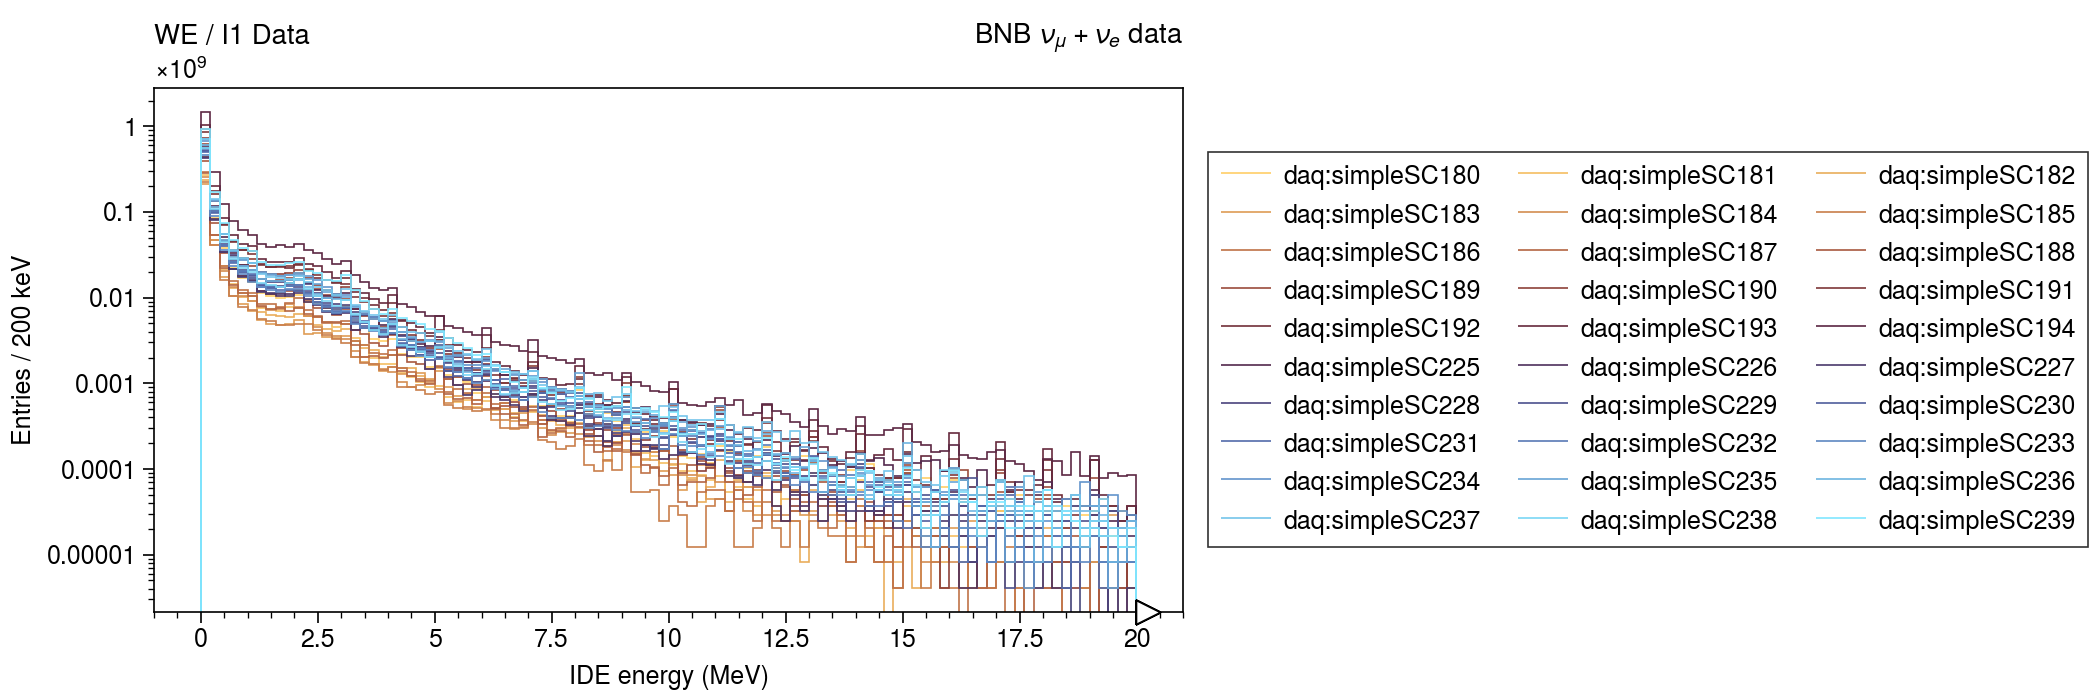

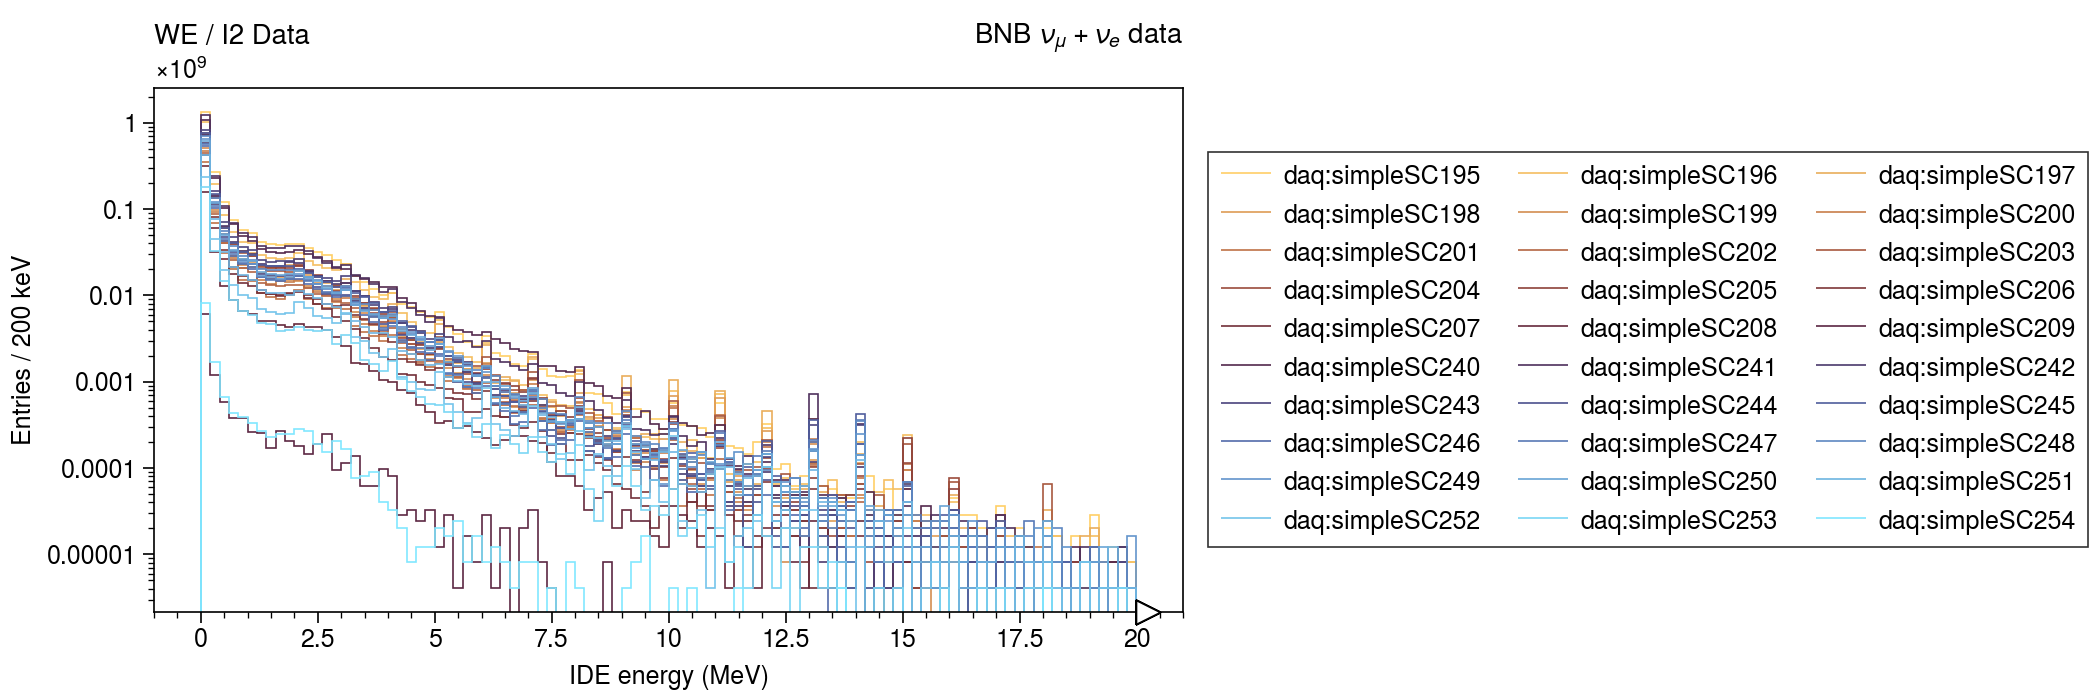

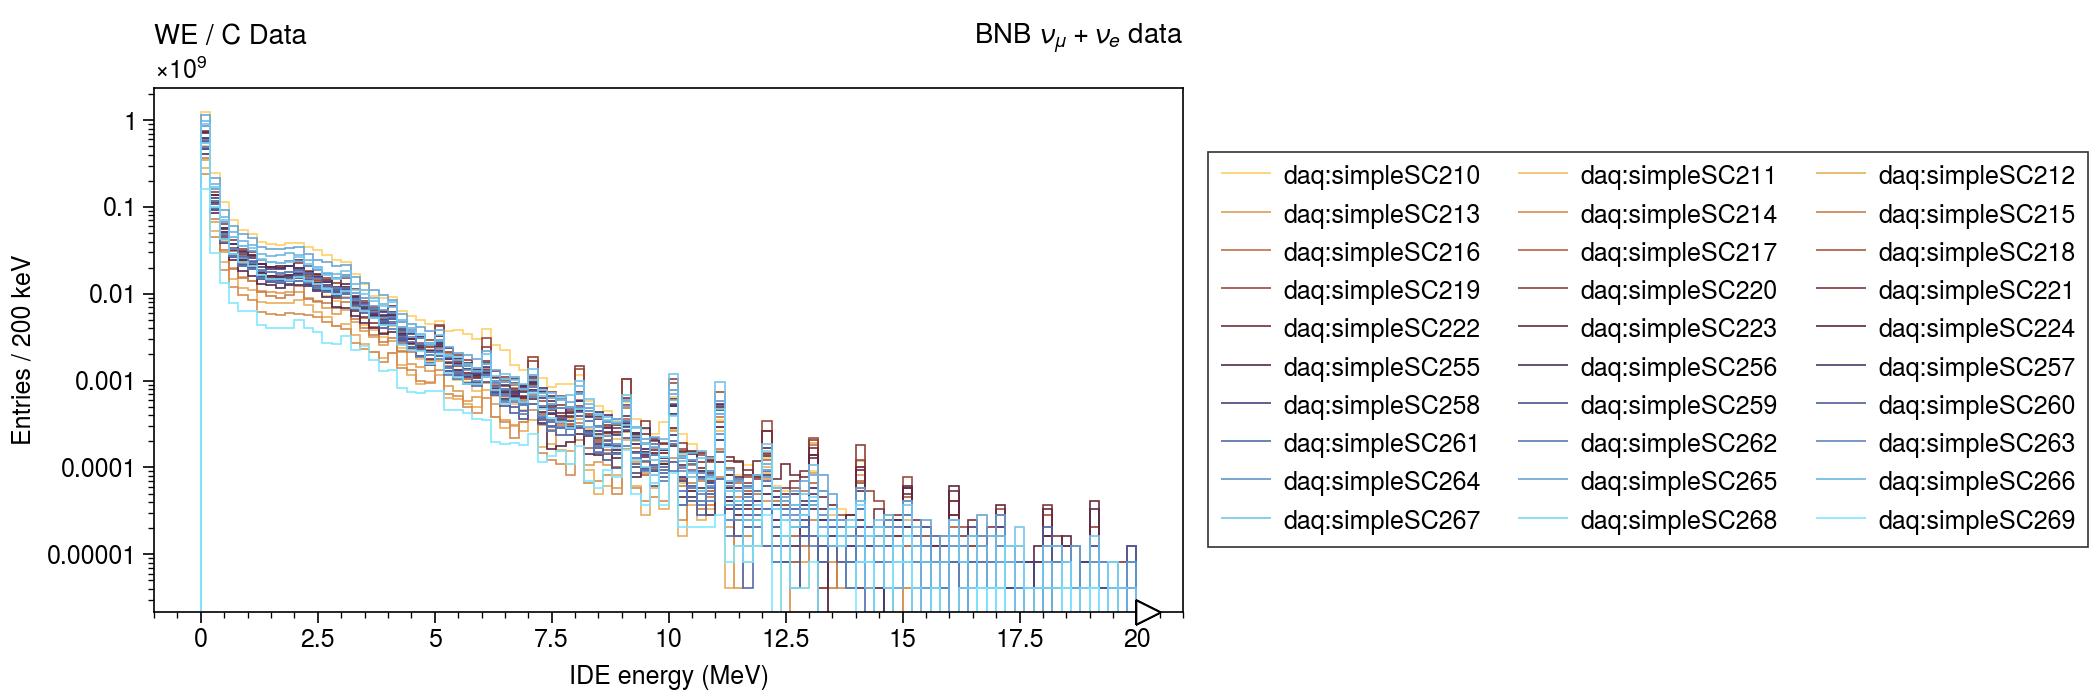

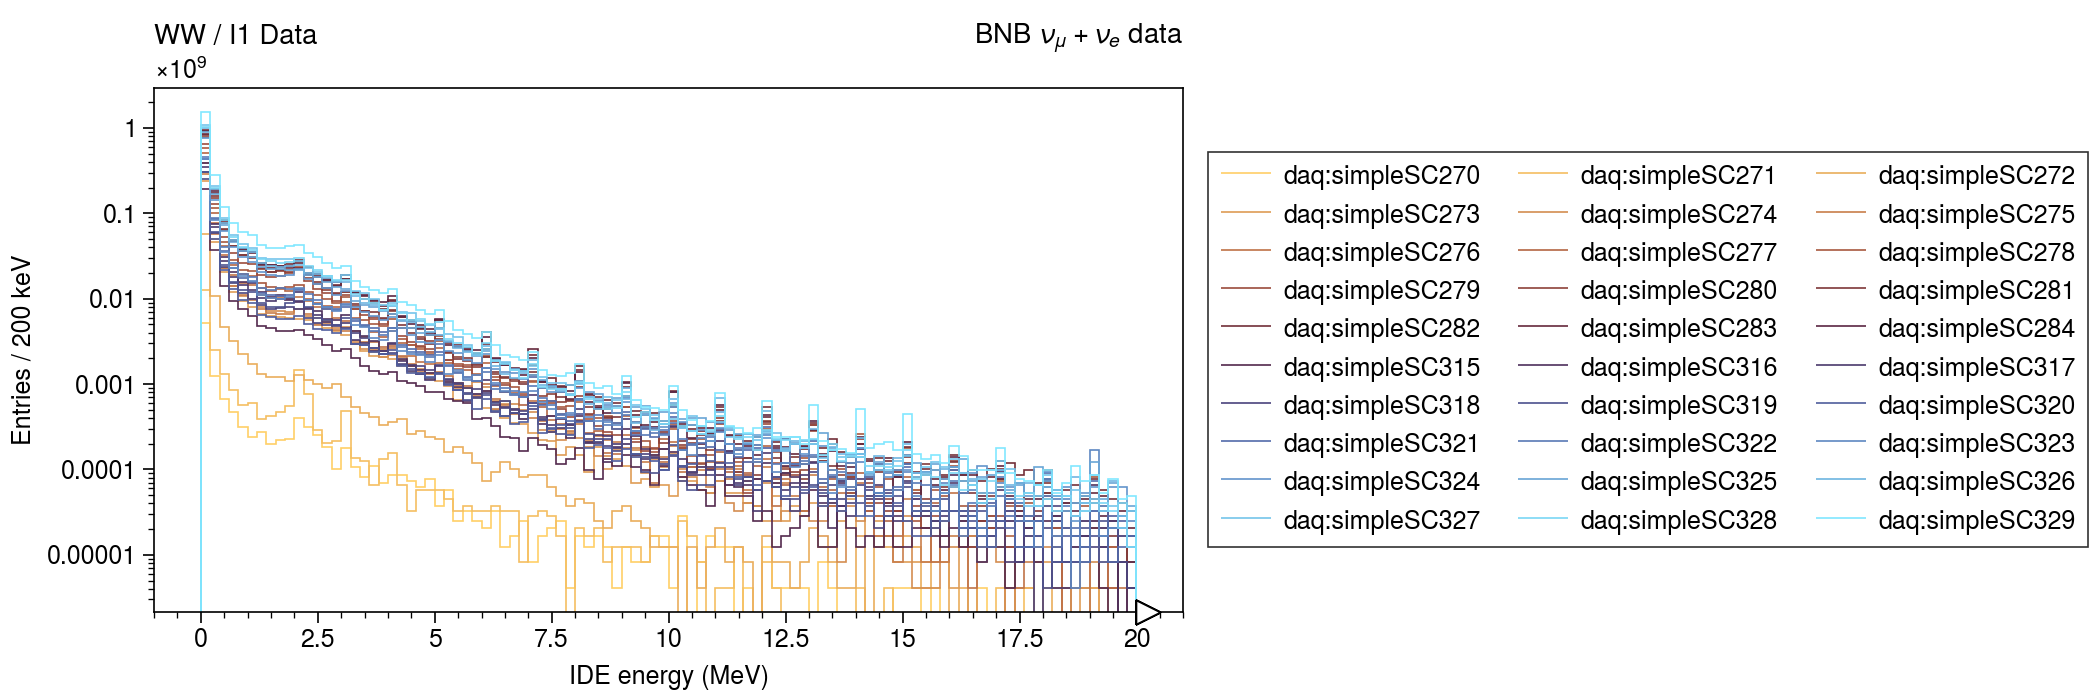

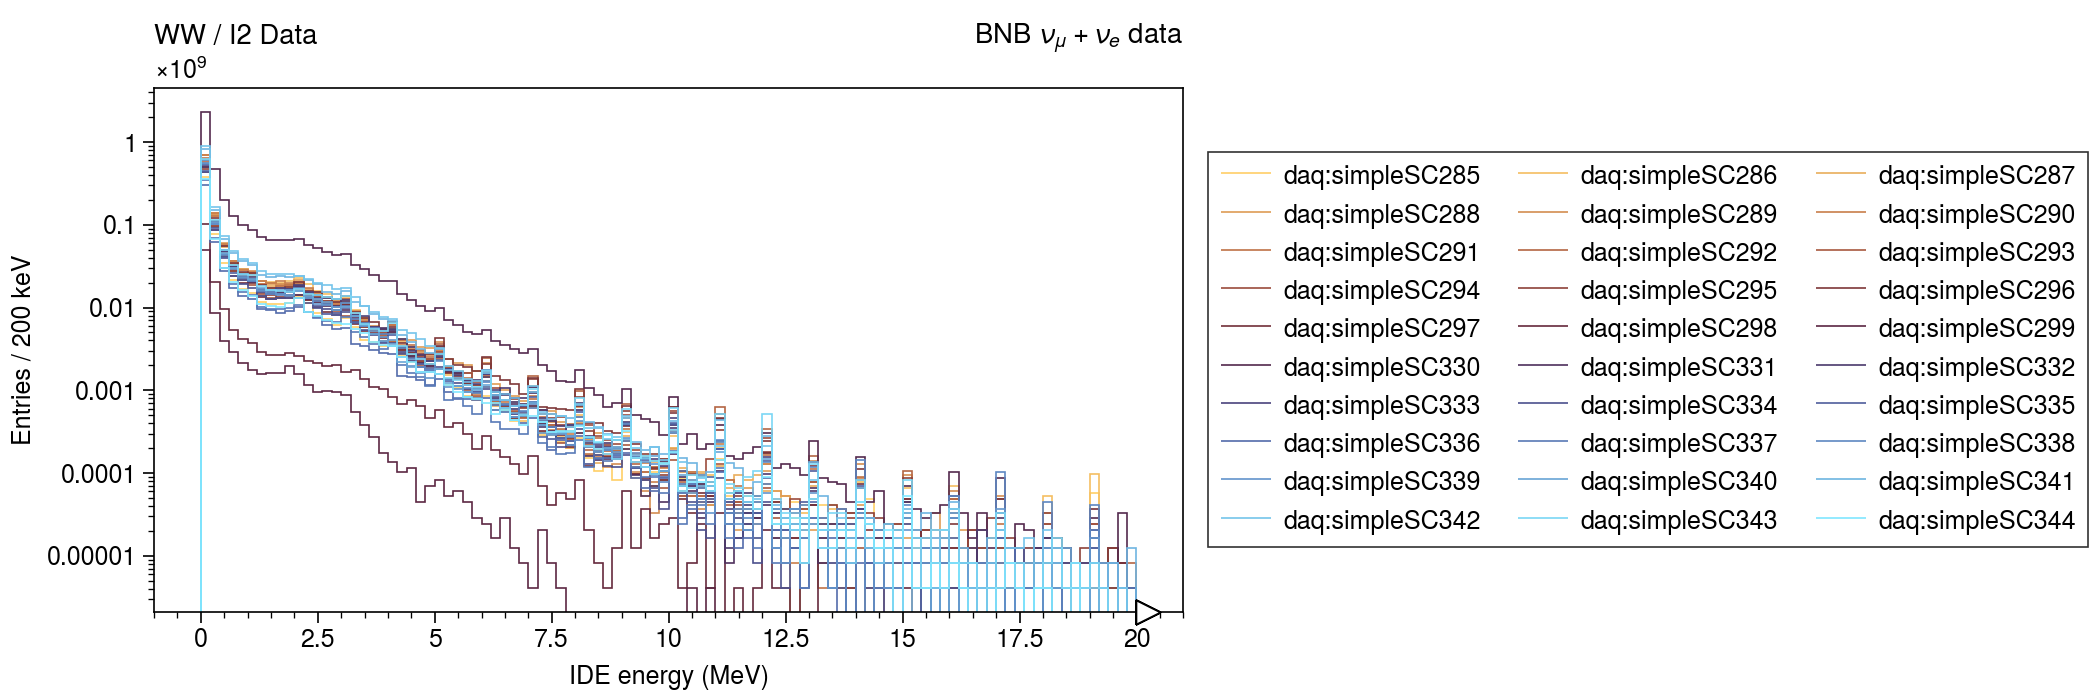

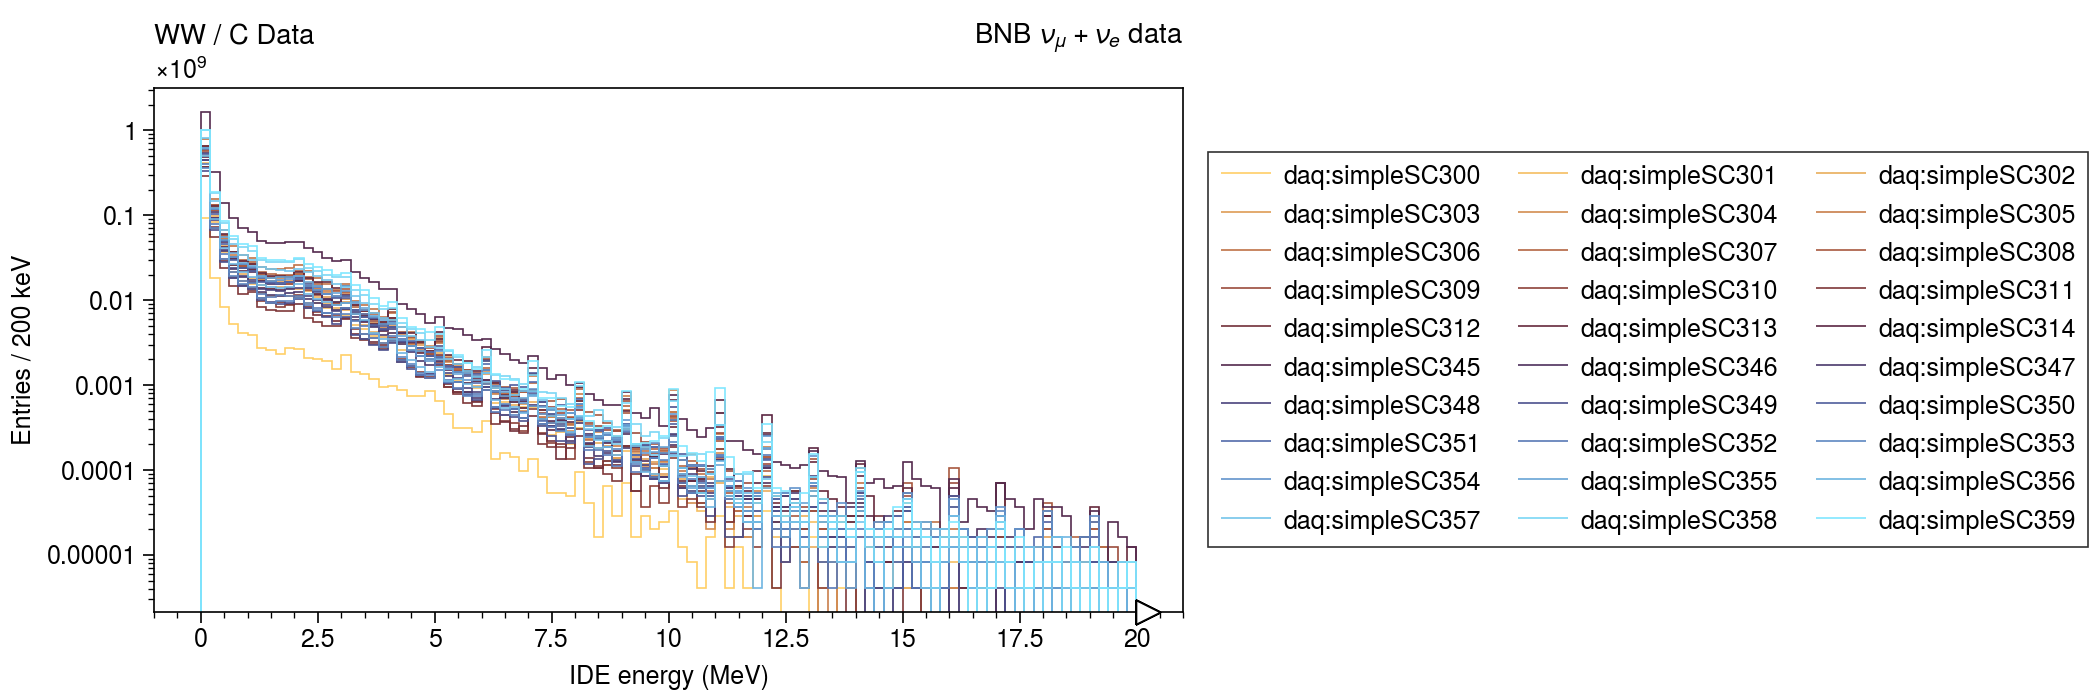

In [98]:
data = uproot.open('yz_simulation_debug_beamdata_addedEnergyHist.root')
planeSC_map = defaultdict(list)
for i in range(360):
    if data[f'daq:simpleSC{i}'].keys():
        planeSC_map[data[f'daq:simpleSC{i}'].keys()[-1].split(';')[0]].append(f'daq:simpleSC{i}')



for plane in ['EE', 'EW', 'WE', 'WW']:
    for view in ['I1', 'I2', 'C']:
        fig, axs = plot.subplots(
            width=10.5, height=3.5,
            xlabel='IDE energy (MeV)', ylabel='Entries / 200 keV',
            ltitle=f'{plane} / {view} Data', rtitle=r'BNB $\nu_\mu + \nu_e$ data'
        )

        plane_view = f'{plane}_{view}_Energy'
        scale_colors = plt.cm.managua(np.linspace(0, 1, len(planeSC_map[plane_view])))
        for i, key in enumerate(planeSC_map[plane_view]):
            hist = data[key][plane_view].to_hist()
            hep.histplot(hist, yerr=False, ax=axs[0], label=key, color=tuple(scale_colors[i]))

        axs.format(yscale='log',)
        fig.legend()
        fig.savefig(f'beamdata_plot_{plane}_{view}_ideEnergy.pdf')

defaultdict(<class 'list'>, {'EE_I1': ['daq:simpleSC'], 'EE_I2': ['daq:simpleSC'], 'EE_C': ['daq:simpleSC'], 'EW_I1': ['daq:simpleSC'], 'EW_I2': ['daq:simpleSC'], 'EW_C': ['daq:simpleSC'], 'yzChannelReading': ['daq:simpleSC'], 'EE_I1_Energy': ['daq:simpleSC'], 'EE_I2_Energy': ['daq:simpleSC'], 'EE_C_Energy': ['daq:simpleSC'], 'EW_I1_Energy': ['daq:simpleSC'], 'EW_I2_Energy': ['daq:simpleSC'], 'EW_C_Energy': ['daq:simpleSC']})


/Users/msotgia/dev_areas/py_envs/sbn-cup-dev/lib/python3.13/site-packages/mplhep/utils.py:365: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  _plottable.errors(assume_variances_equal_values=True)
/Users/msotgia/dev_areas/py_envs/sbn-cup-dev/lib/python3.13/site-packages/mplhep/utils.py:365: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  _plottable.errors(assume_variances_equal_values=True)
/Users/msotgia/dev_areas/py_envs/sbn-cup-dev/lib/python3.13/site-packages/mplhep/utils.py:365: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  _plottable.errors(assume_variances_equal_values=True)
/Users/msotgia/dev_areas/py_envs/sbn-cup-dev/lib/python3.13/site-pa

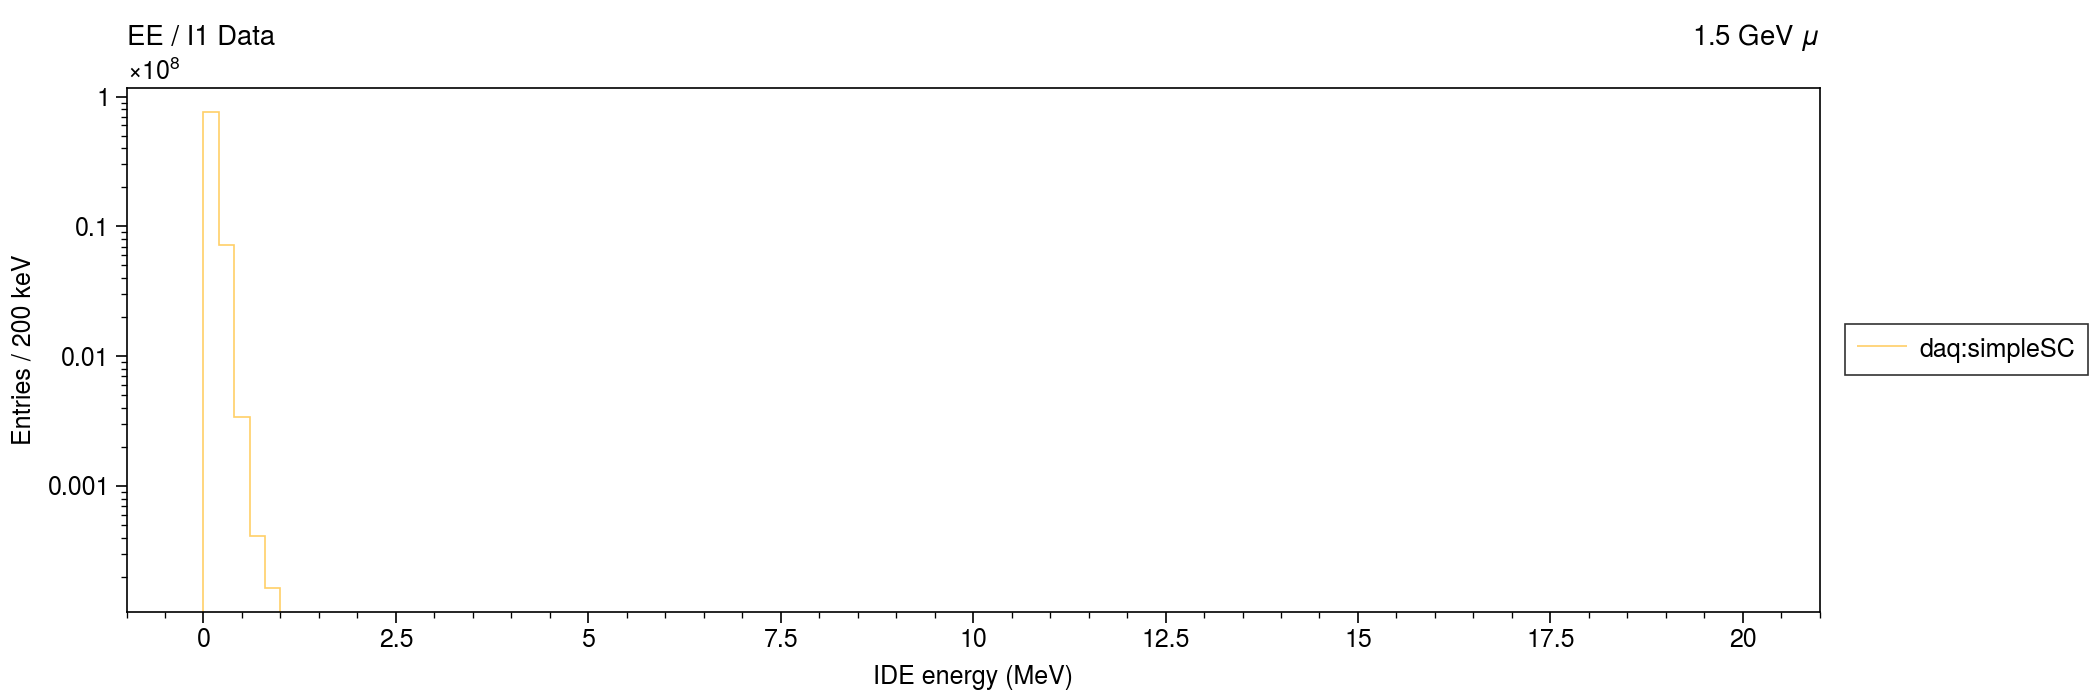

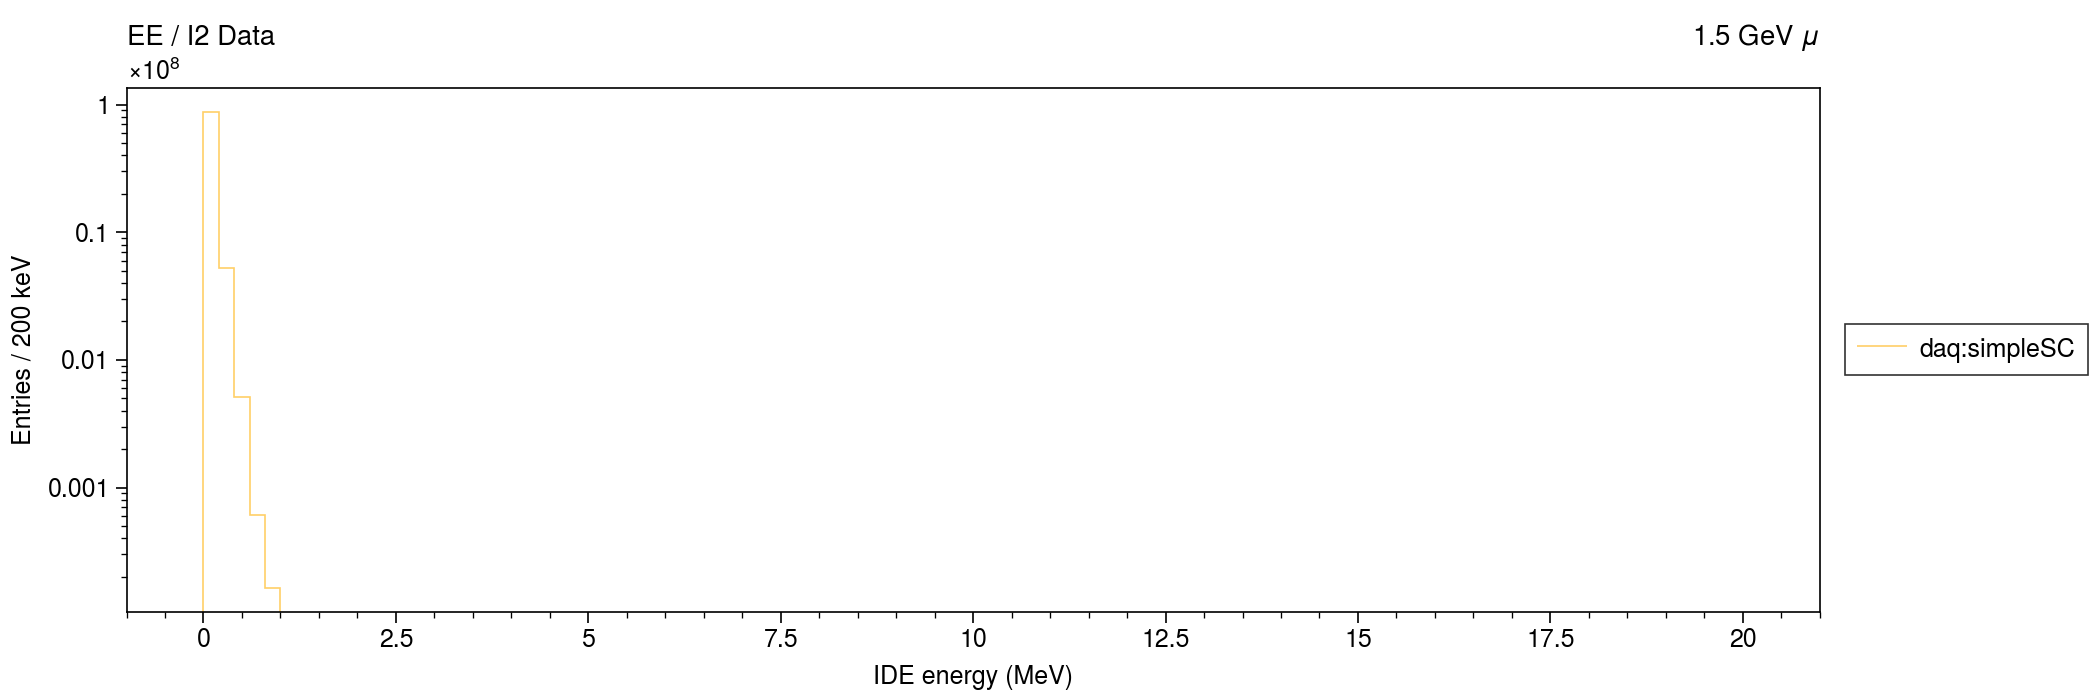

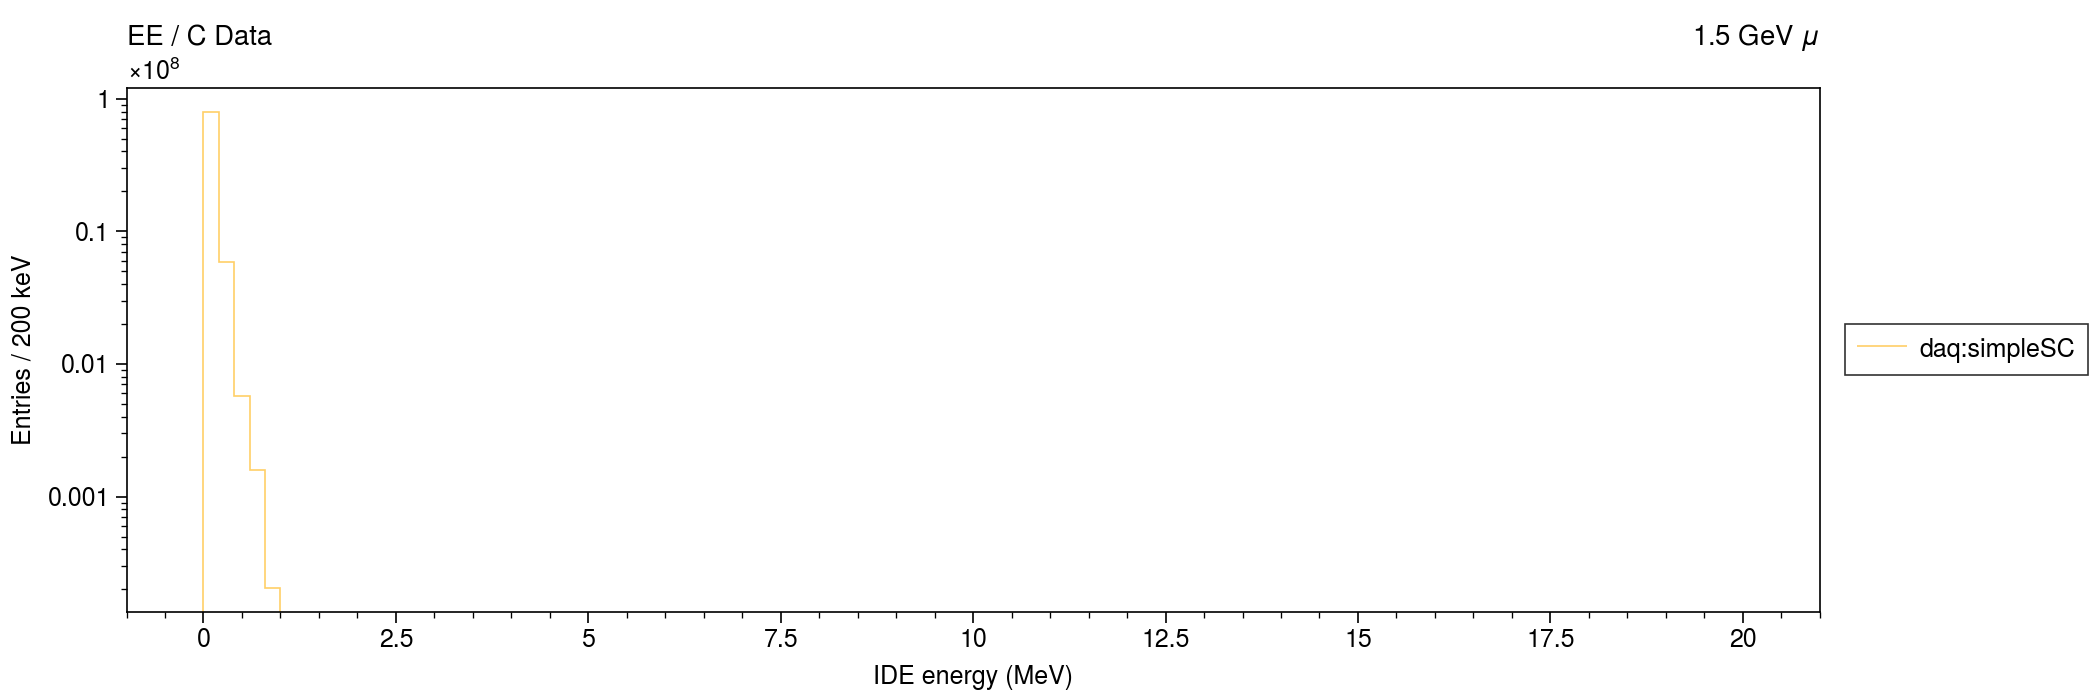

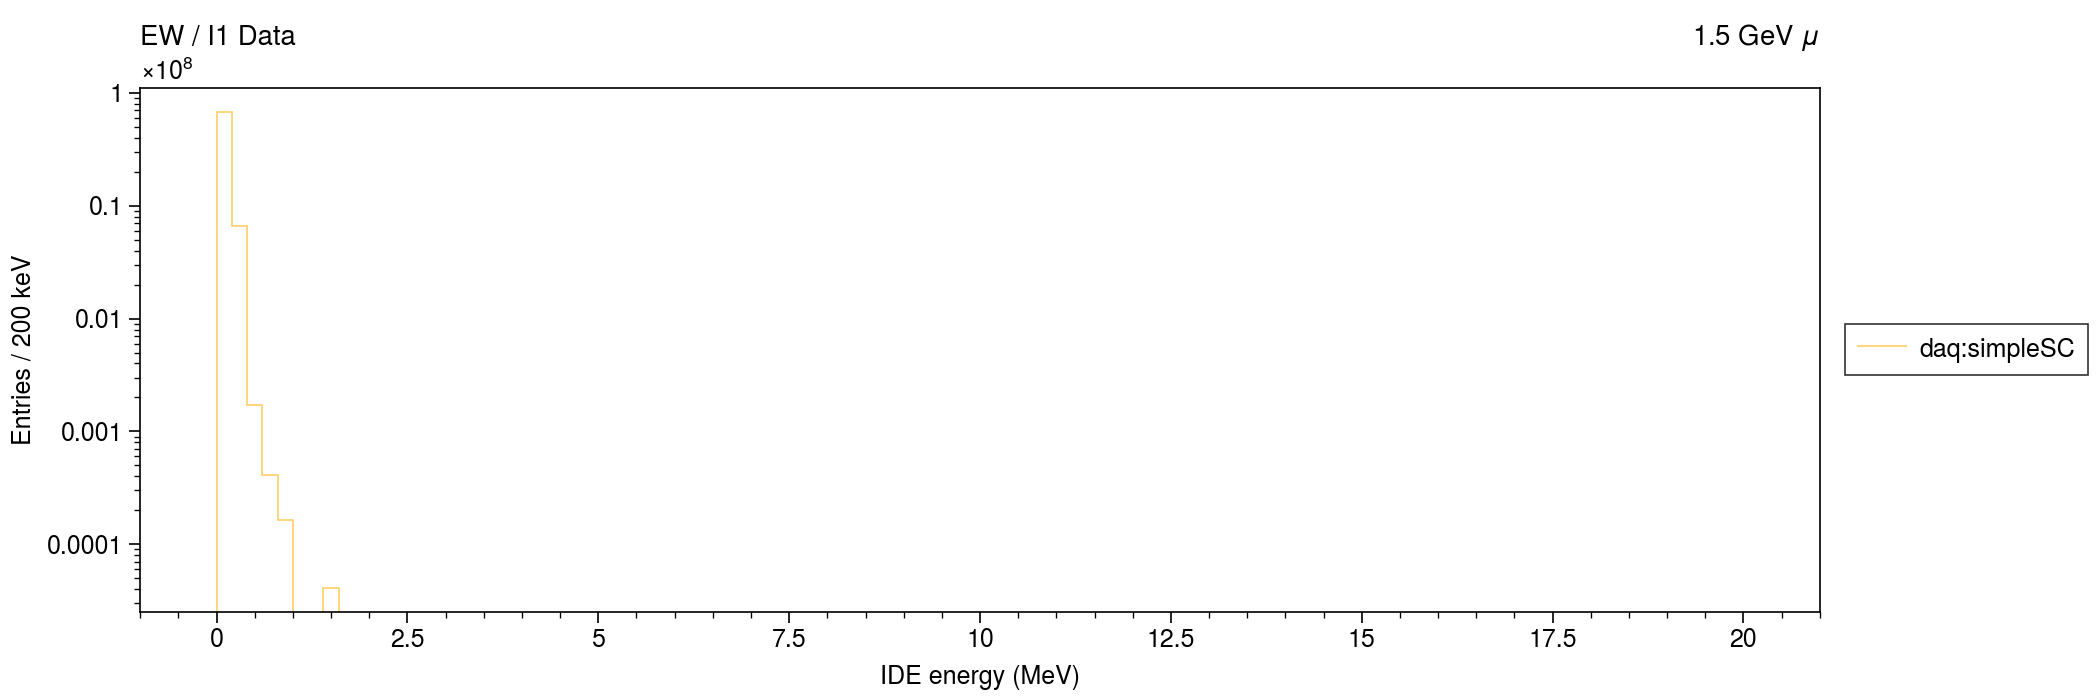

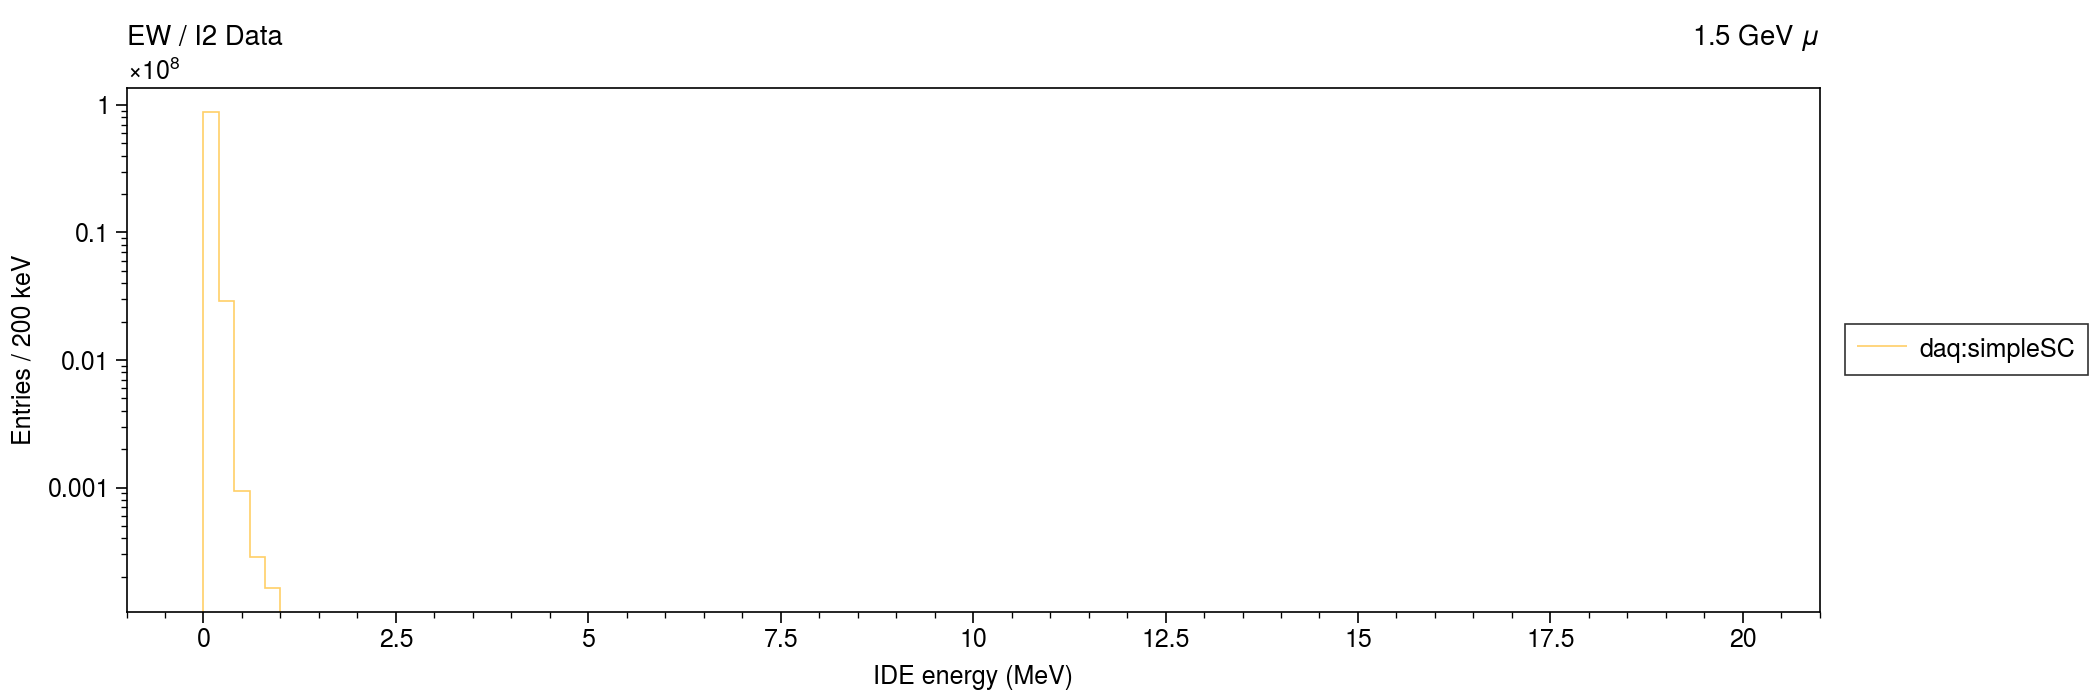

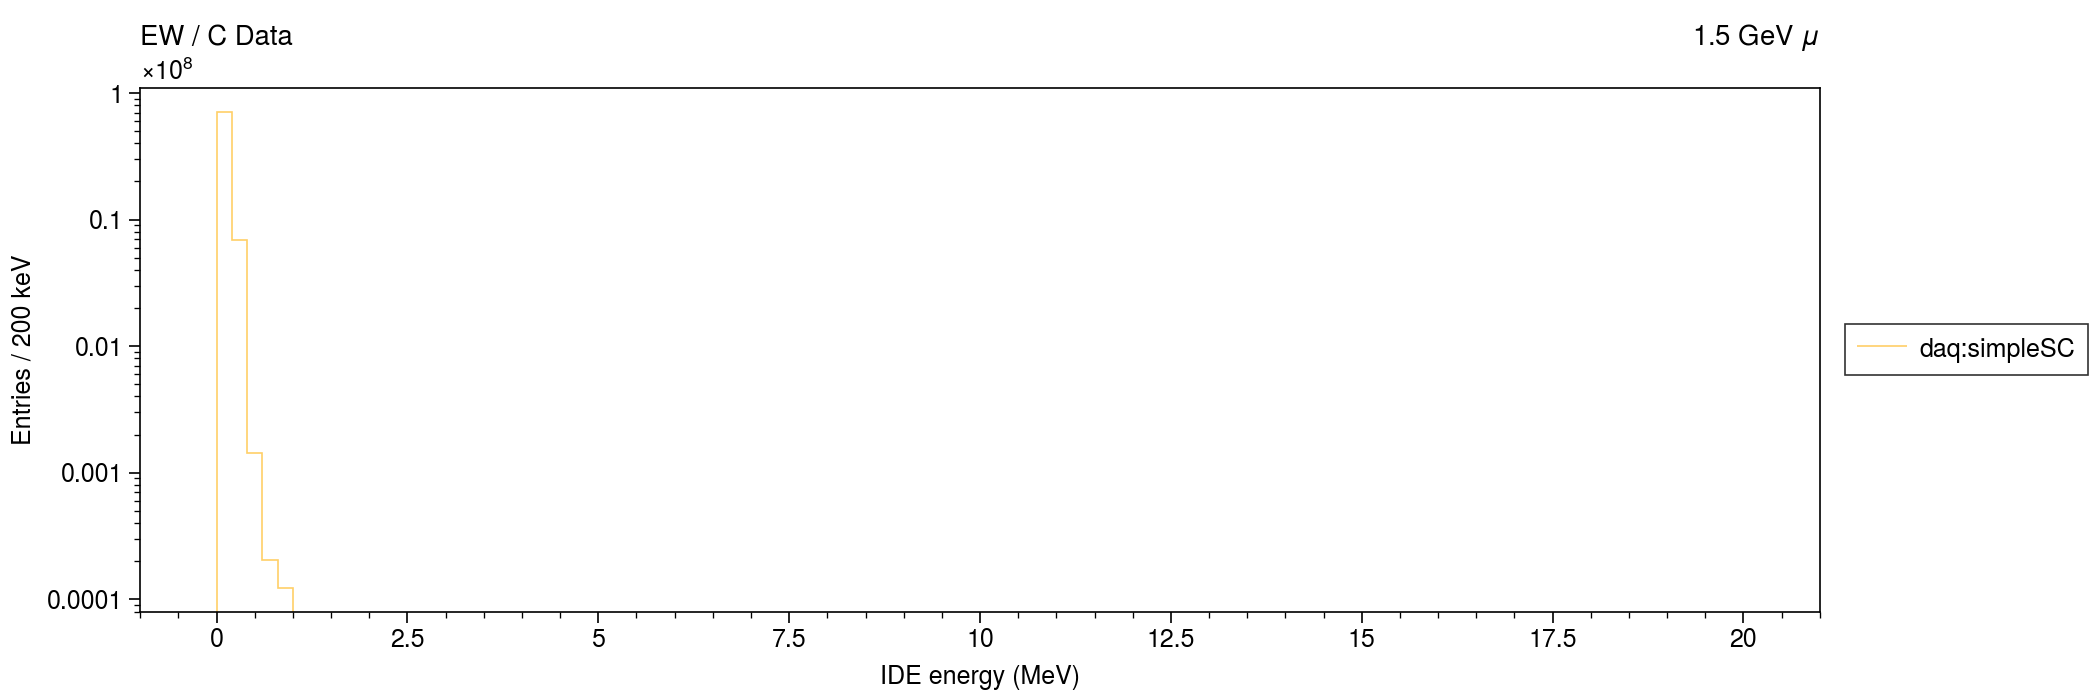

In [103]:
data = uproot.open('yz_simulation_debug_muondata_addedEnergyHist_noYZ.root')
planeSC_map = defaultdict(list)

if data[f'daq:simpleSC'].keys():
    for key in data[f'daq:simpleSC'].keys():
        planeSC_map[key.split(';')[0]].append(f'daq:simpleSC')

print(planeSC_map)

for plane in ['EE', 'EW']:
    for view in ['I1', 'I2', 'C']:
        fig, axs = plot.subplots(
            width=10.5, height=3.5,
            xlabel='IDE energy (MeV)', ylabel='Entries / 200 keV',
            ltitle=f'{plane} / {view} Data', rtitle=f'1.5 GeV $\\mu$'
        )

        plane_view = f'{plane}_{view}_Energy'
        scale_colors = plt.cm.managua(np.linspace(0, 1, len(planeSC_map[plane_view])))
        for i, key in enumerate(planeSC_map[plane_view]):
            hist = data[key][plane_view].to_hist()
            hep.histplot(hist, yerr=False, ax=axs[0], label=key, color=tuple(scale_colors[i]))

        axs.format(yscale='log',)
        fig.legend()
        fig.savefig(f'muon_1.5GeV_noYZ_plot_{plane}_{view}_ideEnergy.pdf')

/Users/msotgia/dev_areas/py_envs/sbn-cup-dev/lib/python3.13/site-packages/mplhep/utils.py:365: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  _plottable.errors(assume_variances_equal_values=True)
/Users/msotgia/dev_areas/py_envs/sbn-cup-dev/lib/python3.13/site-packages/mplhep/utils.py:365: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  _plottable.errors(assume_variances_equal_values=True)
/Users/msotgia/dev_areas/py_envs/sbn-cup-dev/lib/python3.13/site-packages/mplhep/utils.py:741: UserWarning: Integer weights indicate poissonian data. Will calculate Garwood interval if ``scipy`` is installed. Otherwise errors will be set to ``sqrt(w2)``.
  self.errors()
/Users/msotgia/dev_areas/py_envs/sbn-cup-dev/lib/python3.13/site-packages/mplhep/utils.py:365: UserWarning:

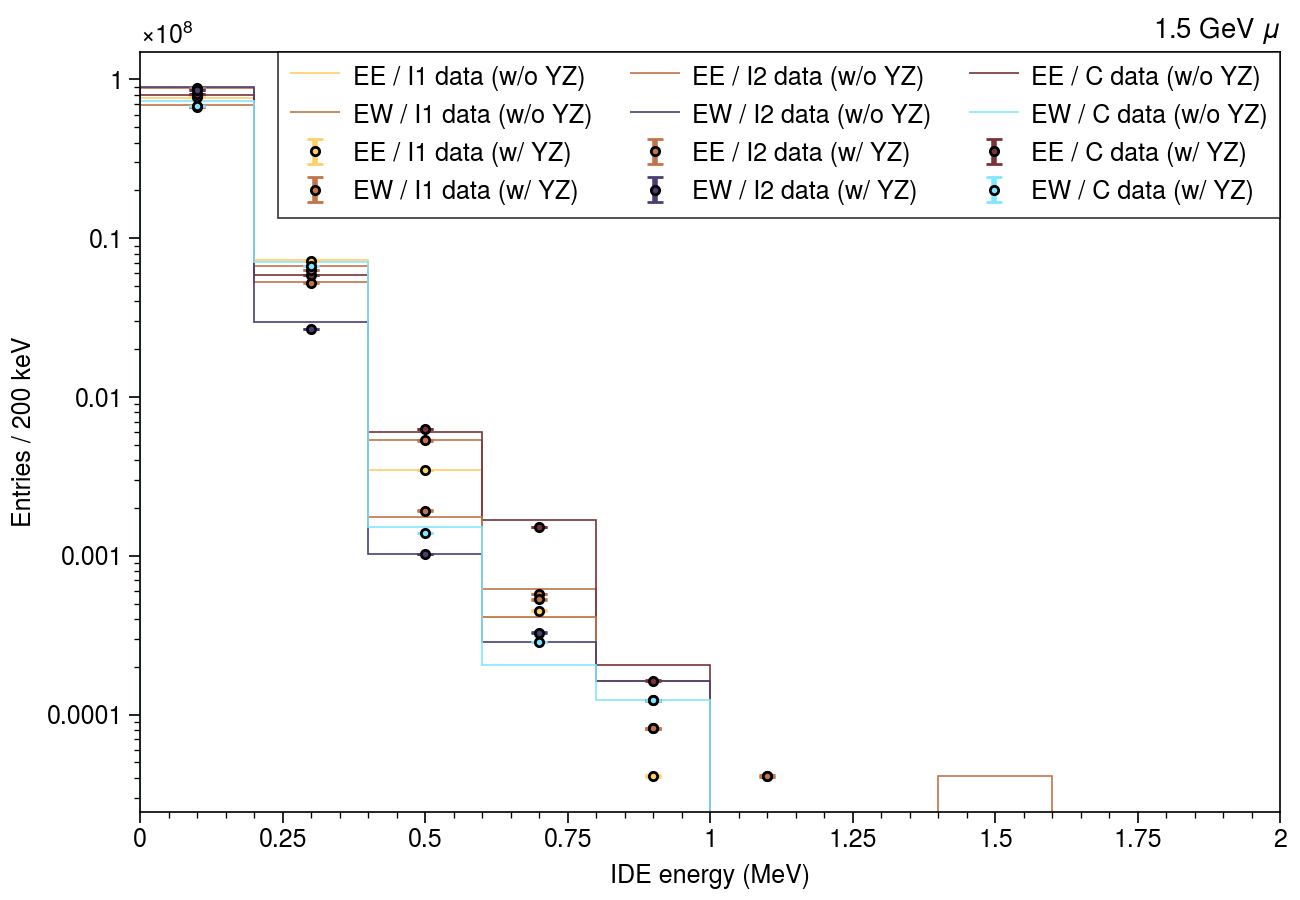

In [121]:
dataNoYZ = uproot.open('yz_simulation_debug_beamdata_addedEnergyHist_no_yz_productionVersion.root')
dataWithYZ = uproot.open('yz_simulation_debug_beamdata_addedEnergyHist_with_yz_productionVersion.root')

planes = ['EE', 'EW']
views  = ['I1', 'I2', 'C']

scale_colors = plt.cm.managua(np.linspace(0, 1, len(planes)*len(views)))

fig, axs = plot.subplots(
    width=6.5, height=4.5,
    xlabel='IDE energy (MeV)', ylabel='Entries / 200 keV',
    rtitle=f'1.5 GeV $\\mu$'
)

for i, plane in enumerate(planes, start=1):
    for j, view in enumerate(views, start=1):

        plane_view = f'{plane}_{view}_Energy'
        
        hist = dataNoYZ['daq:simpleSC'][plane_view].to_hist()
        hep.histplot(hist, yerr=False, ax=axs[0], color=tuple(scale_colors[i*j-1]), label=f'{plane} / {view} data (w/o YZ)')

        hist = dataWithYZ['merge'][plane_view].to_hist()
        hep.histplot(hist, yerr=True, ax=axs[0], color=tuple(scale_colors[i*j-1]), histtype='errorbar', label=f'{plane} / {view} data (w/ YZ)',
                     markeredgecolor='k', marker='o', markersize=3, elinewidth=2)

axs.format(yscale='log', xlim=(0, 2))
axs.legend()
fig.savefig(f'muon_1.5GeV_plotBoth_ideEnergy.pdf')